# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Wildan Andika Permana
- **Email:** wildanae.dev@gmail.com
- **ID Dicoding:** wildanae

## Menentukan Pertanyaan Bisnis
- Apa kategori produk yang memberikan kontribusi terbesar terhadap pendapatan di platform E-Commerce ini?
Tujuan: Mengetahui kategori produk mana yang paling laris dan paling menguntungkan. Analisis ini membantu untuk memahami tren konsumen dan alokasi inventaris serta strategi pemasaran yang lebih efektif.

- Bagaimana tren penjualan dan pendapatan dalam beberapa bulan terakhir?
Tujuan: Menganalisis bagaimana performa penjualan dan pendapatan berubah dari waktu ke waktu untuk mendapatkan wawasan musiman atau pengaruh promosi terhadap penjualan.

- Bagaimana hubungan antara harga produk dan volume penjualannya?
Tujuan: Menganalisis apakah ada korelasi antara harga produk dengan jumlah penjualannya. Apakah produk dengan harga lebih tinggi memiliki lebih sedikit pembeli atau sebaliknya.

## Import Semua Packages/Library yang Digunakan


In [265]:
!pip install numpy pandas scipy matplotlib seaborn tabulate

   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/44.8 MB 1.1 MB/s eta 0:00:40
    --------------------------------------- 0.8/44.8 MB 1.1 MB/s eta 0:00:41
    --------------------------------------- 1.0/44.8 MB 1.1 MB/s eta 0:00:40
    --------------------------------------- 1.0/44.8 MB 1.1 MB/s eta 0:00:40
   - -------------------------------------- 1.3/44.8 MB 907.1 kB/s eta 0:00:48
   - -------------------------------------- 1.3/44.8 MB 907.1 kB/s eta 0:00:48
   - -------------------------------------- 1.3/44.8 MB 907.1 kB/s eta 0:00:48
   - -------------------------------------- 1.6/44.8 MB 735.9 kB/s eta 0:00:59
   - -------------------------------------- 1.8/44.8 MB 798.8 kB/s eta 0:00:54
   - ------------

In [266]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

## Data Wrangling

### Gathering Data

#### Process

In [267]:
# Daftar nama file dataset
files = {
    "customers_dataset": "data/customers_dataset.csv",
    "geolocation_dataset": "data/geolocation_dataset.csv",
    "order_items_dataset": "data/order_items_dataset.csv",
    "order_payments_dataset": "data/order_payments_dataset.csv",
    "order_reviews_dataset": "data/order_reviews_dataset.csv",
    "orders_dataset": "data/orders_dataset.csv",
    "product_category_name_translation": "data/product_category_name_translation.csv",
    "products_dataset": "data/products_dataset.csv",
    "sellers_dataset": "data/sellers_dataset.csv"
}

# Membaca dan menampilkan 5 baris pertama dari setiap dataset
for name, file in files.items():
    try:
        print("\n=== Menampilkan data {} ===".format(name))
        df = pd.read_csv(file)
        print(tabulate(df.head(5), headers='keys', tablefmt='grid'))
        print("\n" + "="*50 + "\n")
    except FileNotFoundError:
        print(f"File {file} tidak ditemukan. Pastikan file tersedia di direktori yang benar.")
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca {file}: {e}")


=== Menampilkan data customers_dataset ===
+----+----------------------------------+----------------------------------+----------------------------+-----------------------+------------------+
|    | customer_id                      | customer_unique_id               |   customer_zip_code_prefix | customer_city         | customer_state   |
+====+==================================+==================================+============================+=======================+==================+
|  0 | 06b8999e2fba1a1fbc88172c00ba8bc7 | 861eff4711a542e4b93843c6dd7febb0 |                      14409 | franca                | SP               |
+----+----------------------------------+----------------------------------+----------------------------+-----------------------+------------------+
|  1 | 18955e83d337fd6b2def6b18a428ac77 | 290c77bc529b7ac935b93aa66c333dc3 |                       9790 | sao bernardo do campo | SP               |
+----+----------------------------------+---------------------

#### **Insight:**

Dari kumpulan data file E-Commerce Public Dataset dapat diketahui

1. Customers Dataset: Dataset ini berisi informasi pelanggan dengan customer_id dan customer_unique_id yang dapat digunakan untuk mengidentifikasi setiap pelanggan secara unik.
2. Geolocation Dataset: Data geolokasi ini mencakup kode pos, latitude, dan longitude yang terkait dengan lokasi pengiriman.
3. Order Items Dataset: Dataset ini memuat informasi tentang order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, dan freight_value.
4. Order Payments Dataset: Data ini berisi informasi pembayaran untuk setiap pesanan, termasuk payment_type, payment_value, dan payment_installments.
5. Order Reviews Dataset: Dataset ini memuat ulasan pelanggan dengan review_id, order_id, dan review_score.
6. Orders Dataset:Dataset ini menyimpan data pesanan yang mencakup order_id, customer_id, order_status, serta berbagai timestamp yang terkait dengan status dan pengiriman pesanan.
7. Product Category Name Translation Dataset: Dataset ini menyajikan nama kategori produk dalam bahasa lokal dan terjemahannya dalam bahasa Inggris.
8. Products Dataset: Dataset produk memuat informasi produk seperti product_id, product_category_name, product_name_lenght, dan product_description_lenght.
9. Sellers Dataset: Dataset ini memberikan informasi tentang seller_id, seller_city, dan seller_state, dengan banyak penjual terletak di kota-kota seperti Campinas dan São Paulo.

### Assessing Data

#### Jumlah dan Tipe Data

In [268]:
for name, file in files.items():
    print(f"\n===  Menampilkan Jumlah dan Tipe data pada Dataset: {name} ===")
    
    df = pd.read_csv(file)
    print(df.info())
    print("\n" + "="*50 + "\n")


===  Menampilkan Jumlah dan Tipe data pada Dataset: customers_dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None



===  Menampilkan Jumlah dan Tipe data pada Dataset: geolocation_dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocat

#### Missing value

In [269]:
for name, file in files.items():
    print(f"\n===  Menampilkan Missing Value pada Dataset: {name} ===")
    df = pd.read_csv(file)

    missing_values = df.isna().sum()  # Hitung jumlah missing value per kolom

    if missing_values.any():  # Cek apakah ada kolom dengan missing value
        # Hanya tampilkan kolom dengan missing value
        print("Jumlah missing value per kolom:")
        print(tabulate(missing_values[missing_values > 0].reset_index(), 
                        headers=["Kolom", "Jumlah Missing Value"], 
                        tablefmt="grid"))
        # Tampilkan 5 baris teratas yang memiliki missing value di setidaknya satu kolom
        rows_with_missing = df[df.isna().any(axis=1)].head(5)
        print("\nBaris dengan missing value:")
        print(tabulate(rows_with_missing, headers="keys", tablefmt="grid"))

        # Menampilkan top 5 value_counts untuk kolom yang memiliki missing value
        print("\nTop 5 Value Counts untuk kolom dengan missing value:")
        for column in missing_values.index[missing_values > 0]:
                print(f"\nKolom: {column}")
                value_counts = df[column].value_counts().head(5)
                print(tabulate(value_counts.reset_index(), headers=[column, 'Count'], tablefmt="grid"))
    else:
        print("Tidak ada missing value pada dataset ini.\n")
        
    print("=" * 50 + "\n")


===  Menampilkan Missing Value pada Dataset: customers_dataset ===
Tidak ada missing value pada dataset ini.



===  Menampilkan Missing Value pada Dataset: geolocation_dataset ===
Tidak ada missing value pada dataset ini.



===  Menampilkan Missing Value pada Dataset: order_items_dataset ===
Tidak ada missing value pada dataset ini.



===  Menampilkan Missing Value pada Dataset: order_payments_dataset ===
Tidak ada missing value pada dataset ini.



===  Menampilkan Missing Value pada Dataset: order_reviews_dataset ===
Jumlah missing value per kolom:
+----+------------------------+------------------------+
|    | Kolom                  |   Jumlah Missing Value |
+====+========================+========================+
|  0 | review_comment_title   |                  87656 |
+----+------------------------+------------------------+
|  1 | review_comment_message |                  58247 |
+----+------------------------+------------------------+

Baris dengan missing value:
+----+-----

#### Duplicate data

In [270]:
for name, file in files.items():
    print(f"\n===  Memeriksa data duplikat pada Dataset: {name} ===")
    df = pd.read_csv(file)
    
    duplicates = df[df.duplicated()]  # Mengidentifikasi duplikasi di seluruh DataFrame
    
    if not duplicates.empty:
        print(f"Dataset {name} memiliki data duplikat")
        print("Jumlah duplikasi: ",duplicates.duplicated().sum())  # Menampilkan jumlah data duplikasi
    else:
        print(f"Dataset {name} tidak memiliki data duplikat")
    
    print("\n" + "="*50 + "\n")



===  Memeriksa data duplikat pada Dataset: customers_dataset ===
Dataset customers_dataset tidak memiliki data duplikat



===  Memeriksa data duplikat pada Dataset: geolocation_dataset ===
Dataset geolocation_dataset memiliki data duplikat
Jumlah duplikasi:  133657



===  Memeriksa data duplikat pada Dataset: order_items_dataset ===
Dataset order_items_dataset tidak memiliki data duplikat



===  Memeriksa data duplikat pada Dataset: order_payments_dataset ===
Dataset order_payments_dataset tidak memiliki data duplikat



===  Memeriksa data duplikat pada Dataset: order_reviews_dataset ===
Dataset order_reviews_dataset tidak memiliki data duplikat



===  Memeriksa data duplikat pada Dataset: orders_dataset ===
Dataset orders_dataset tidak memiliki data duplikat



===  Memeriksa data duplikat pada Dataset: product_category_name_translation ===
Dataset product_category_name_translation tidak memiliki data duplikat



===  Memeriksa data duplikat pada Dataset: products_dataset ===
Da

#### Inaccurate value

In [271]:
for name, file in files.items():
    print(f"\n=== Memvalidasi Incaccurate value pada Dataset: {name} ===")
    df = pd.read_csv(file)
    print(tabulate(df.describe(), headers='keys', tablefmt='grid'))
    print("\n" + "="*50 + "\n")



=== Memvalidasi Incaccurate value pada Dataset: customers_dataset ===
+-------+----------------------------+
|       |   customer_zip_code_prefix |
+=======+============================+
| count |                    99441   |
+-------+----------------------------+
| mean  |                    35137.5 |
+-------+----------------------------+
| std   |                    29797.9 |
+-------+----------------------------+
| min   |                     1003   |
+-------+----------------------------+
| 25%   |                    11347   |
+-------+----------------------------+
| 50%   |                    24416   |
+-------+----------------------------+
| 75%   |                    58900   |
+-------+----------------------------+
| max   |                    99990   |
+-------+----------------------------+



=== Memvalidasi Incaccurate value pada Dataset: geolocation_dataset ===
+-------+-------------------------------+-------------------+-------------------+
|       |   geolocation_zip_cod

#### Outlier


=== Mengidentifikasi Outlier pada Dataset: customers_dataset ===
Dataset customers_dataset tidak memiliki outlier pada kolom 'customer_zip_code_prefix'


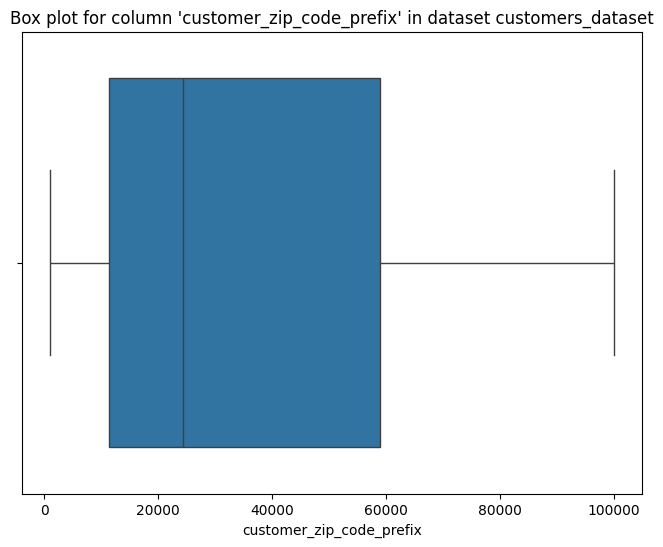




=== Mengidentifikasi Outlier pada Dataset: geolocation_dataset ===
Dataset geolocation_dataset tidak memiliki outlier pada kolom 'geolocation_zip_code_prefix'


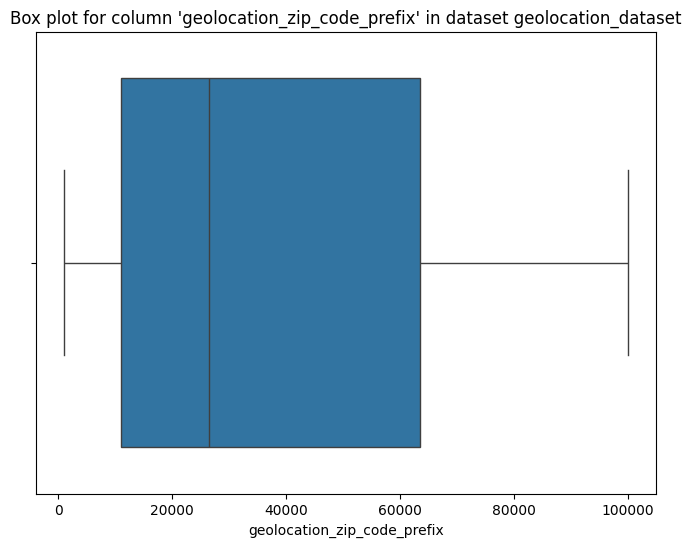



Dataset geolocation_dataset ditemukan outlier pada kolom : 'geolocation_lat'


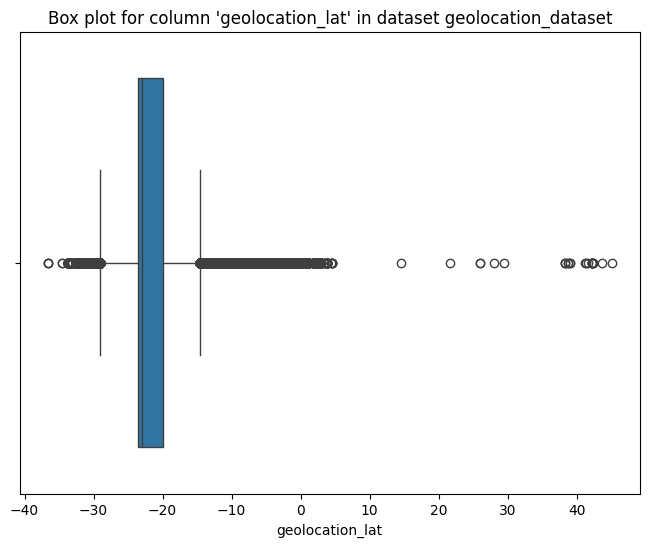



Dataset geolocation_dataset ditemukan outlier pada kolom : 'geolocation_lng'


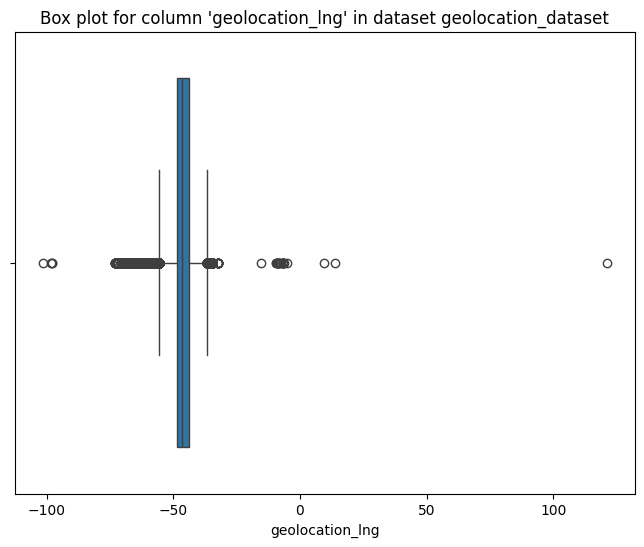




=== Mengidentifikasi Outlier pada Dataset: order_items_dataset ===
Dataset order_items_dataset ditemukan outlier pada kolom : 'order_item_id'


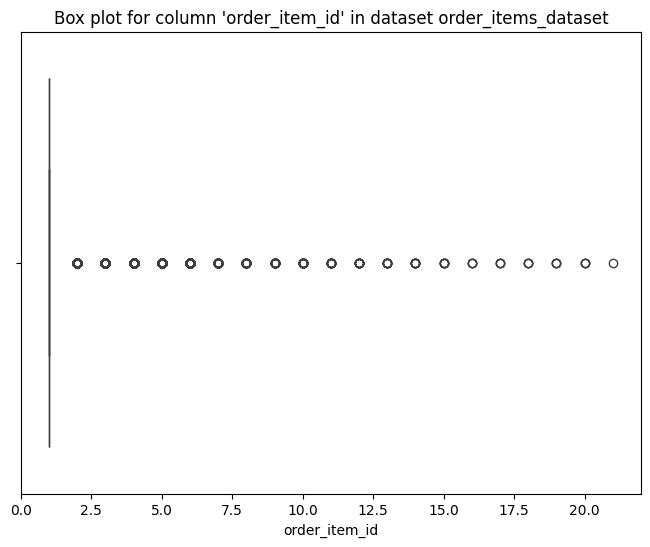



Dataset order_items_dataset ditemukan outlier pada kolom : 'price'


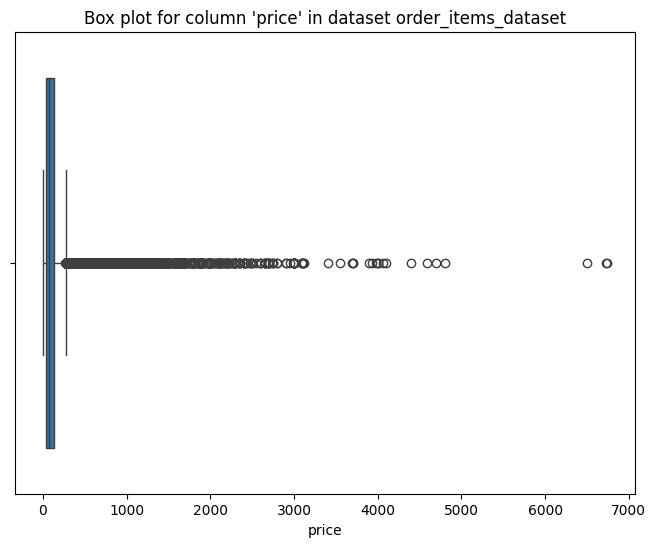



Dataset order_items_dataset ditemukan outlier pada kolom : 'freight_value'


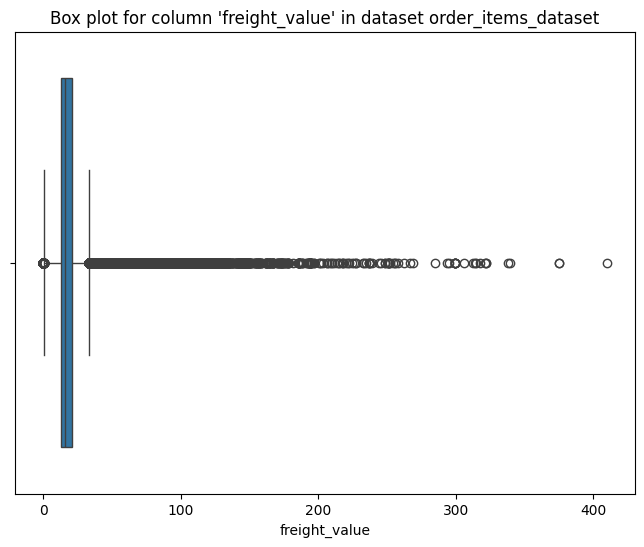




=== Mengidentifikasi Outlier pada Dataset: order_payments_dataset ===
Dataset order_payments_dataset ditemukan outlier pada kolom : 'payment_sequential'


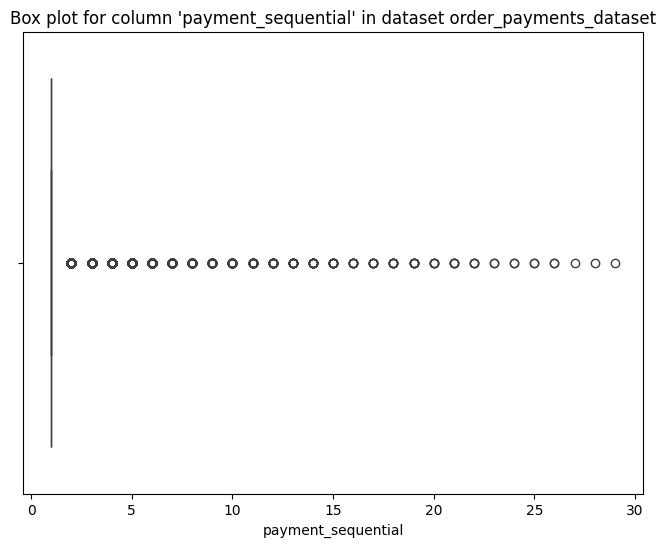



Dataset order_payments_dataset ditemukan outlier pada kolom : 'payment_installments'


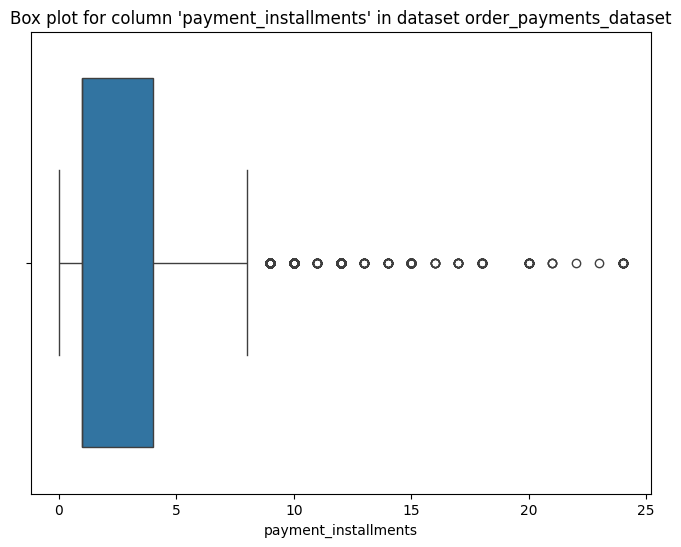



Dataset order_payments_dataset ditemukan outlier pada kolom : 'payment_value'


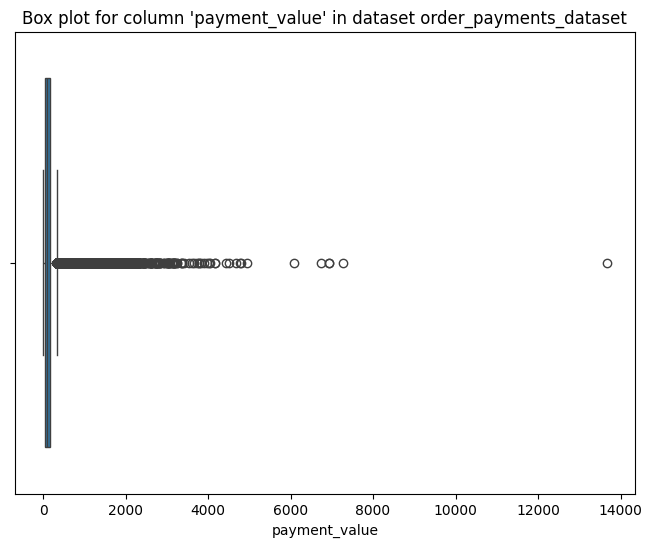




=== Mengidentifikasi Outlier pada Dataset: order_reviews_dataset ===
Dataset order_reviews_dataset ditemukan outlier pada kolom : 'review_score'


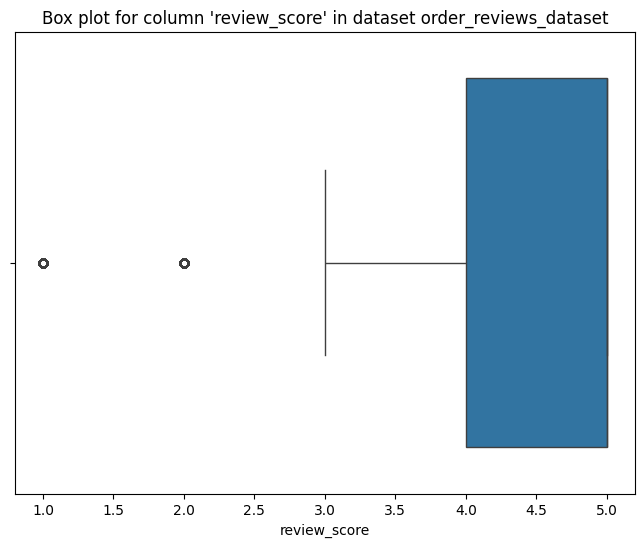




=== Mengidentifikasi Outlier pada Dataset: orders_dataset ===

=== Mengidentifikasi Outlier pada Dataset: product_category_name_translation ===

=== Mengidentifikasi Outlier pada Dataset: products_dataset ===
Dataset products_dataset ditemukan outlier pada kolom : 'product_name_lenght'


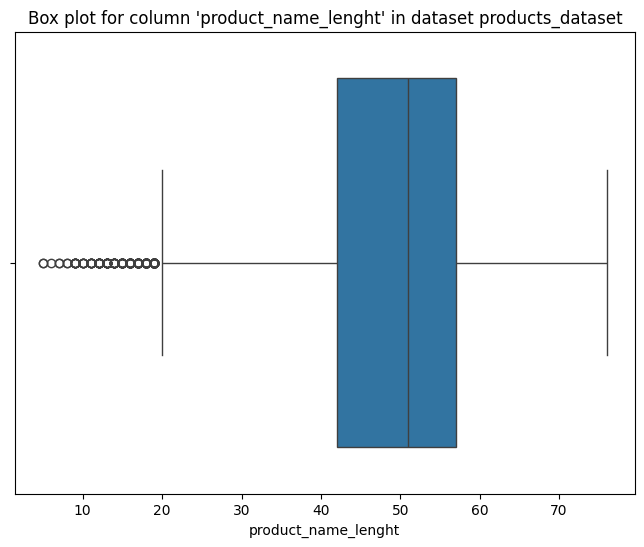



Dataset products_dataset ditemukan outlier pada kolom : 'product_description_lenght'


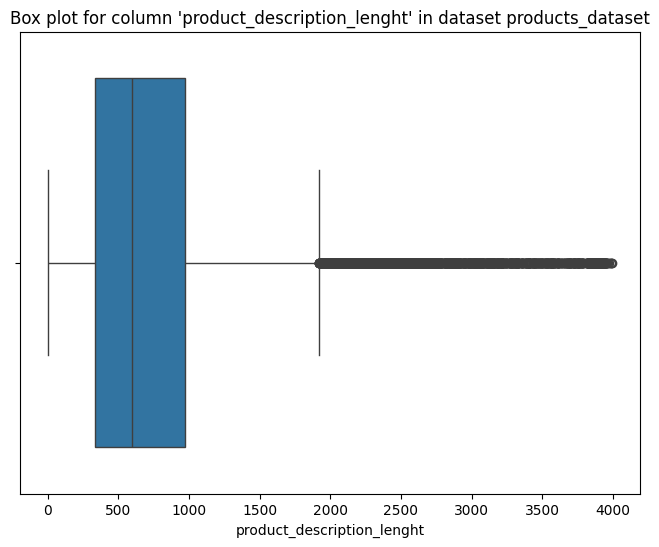



Dataset products_dataset ditemukan outlier pada kolom : 'product_photos_qty'


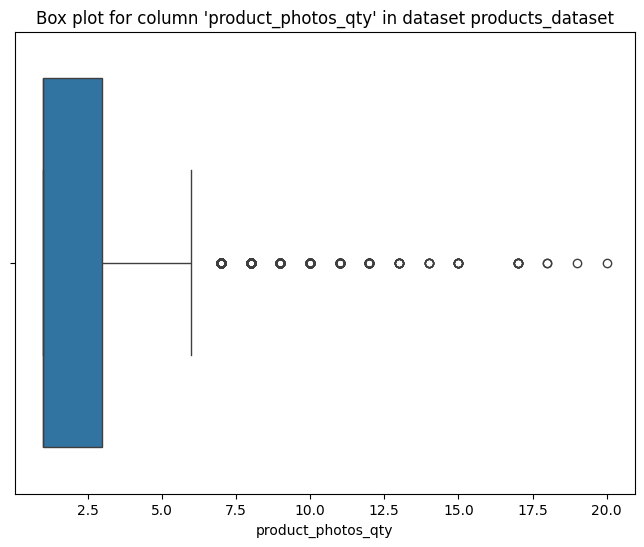



Dataset products_dataset ditemukan outlier pada kolom : 'product_weight_g'


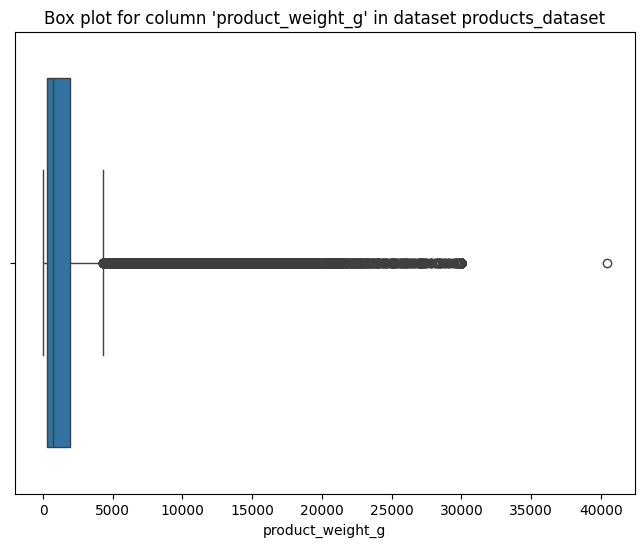



Dataset products_dataset ditemukan outlier pada kolom : 'product_length_cm'


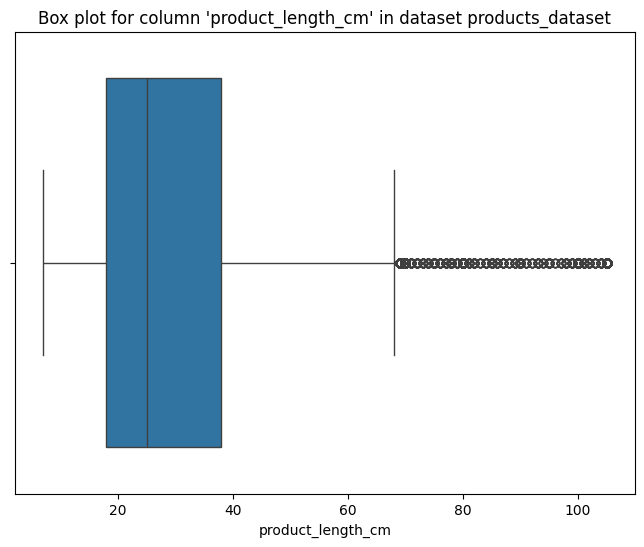



Dataset products_dataset ditemukan outlier pada kolom : 'product_height_cm'


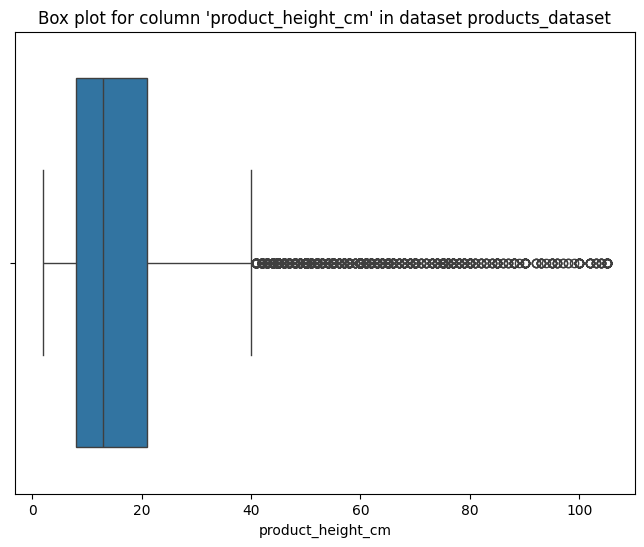



Dataset products_dataset ditemukan outlier pada kolom : 'product_width_cm'


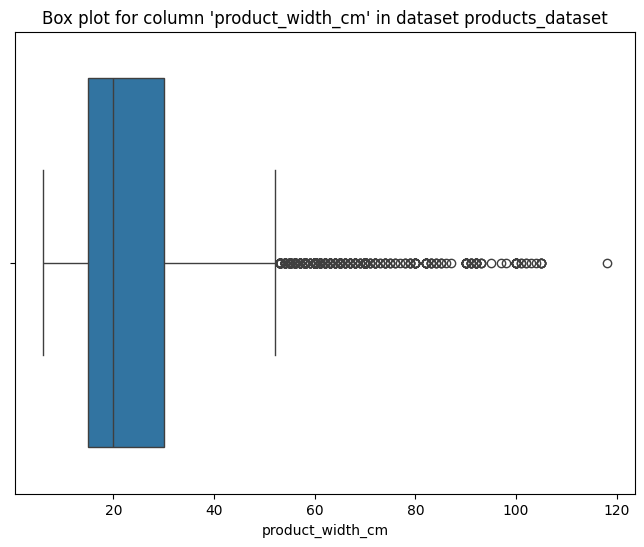




=== Mengidentifikasi Outlier pada Dataset: sellers_dataset ===
Dataset sellers_dataset tidak memiliki outlier pada kolom 'seller_zip_code_prefix'


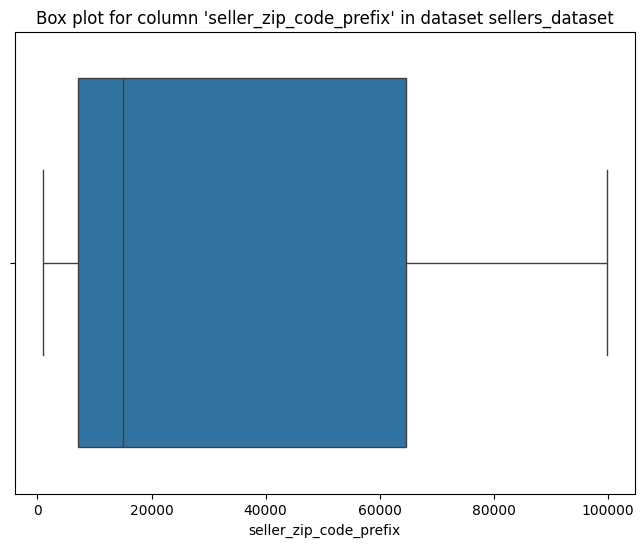

In [272]:
for name, file in files.items():
    print(f"\n=== Mengidentifikasi Outlier pada Dataset: {name} ===")
    df = pd.read_csv(file)
    
    # Tentukan kolom yang ingin dicek outlier-nya
    for column in df.select_dtypes(include=['float64', 'int64']).columns:  # Cek hanya kolom numerik
        Q1 = df[column].quantile(0.25)  # Kuartil pertama
        Q3 = df[column].quantile(0.75)  # Kuartil ketiga
        IQR = Q3 - Q1  # Interquartile range
        
        # Tentukan batas bawah dan atas untuk outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identifikasi outlier
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        if not outliers.empty:
            print(f"Dataset {name} ditemukan outlier pada kolom : '{column}'")
        else:
            print(f"Dataset {name} tidak memiliki outlier pada kolom '{column}'")

        # Visualisasi dengan box plot
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f"Box plot for column '{column}' in dataset {name}")
        plt.xlabel(column)
        plt.show()
    
        print("\n" + "="*50 + "\n")


#### **Insight:**

Oke, sampai tahap ini, kita telah berhasil mengidentifikasi berbagai masalah pada data yang telah kita kumpulkan. Berikut merupakan rangkumannya.

| Dataset                | Tipe Data                                              | Missing Value                                               | Duplicate Data             | Inaccurate Value | Outlier                                  |
|--------------------- |-------------------------------------------------------|---------------------------------------------------------------|----------------------------|---------------|-----------------------------------------|
| customers dataset    | -                                                     | -                                                            | -                          | -             | -                                       |
| geolocation_dataset  | -                                                     | -                                                            | Jumlah :  133657                      | -             | geolocation_lat,	geolocation_lng          |
| order_items_dataset  | shipping_limit_date (object)                        | -                                                            | -                          | -             | order_item_id, price, freight_value         |
| order_payments_dataset | -                                                  | -                                                            | -                          | -             | payment_sequential, payment_installments, payment_value |
| order_reviews_dataset | -                                                     | review_comment_title (87656), review_comment_message (58247) | -                          | -             | review_score                             |
| orders_dataset       | order_purchase_timestamp (object), order_approved_at (object), order_delivered_carrier_date (object), order_delivered_customer_date (object), order_estimated_delivery_date (object) | order_approved_at (160), order_delivered_carrier_date (1783), order_delivered_customer_date (2965) | - | - | -                                           |
| product_category_name_translation | -                                                     | -                                                            | -                          | -             | -                                       |
| products_dataset     | - | product_category_name (610), product_name_lenght (610), product_description_lenght (610), product_photos_qty (610), product_weight_g (2), product_length_cm (2), product_height_cm (2), product_width_cm (2) | - | - | product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm |
| sellers_dataset      | -                                                     | -                                                            | -                          | -             | -                                       |

### Cleaning Data

#### Menyimpan DataFrame

In [273]:
# Menyimpan DataFrame yang akan dibersihkan dengan nama dataset sebagai key dan DataFrame yang bersih sebagai value.
cleaned_df = {}

#### Memperbaiki Jumlah dan Tipe Data

In [293]:
for name, file in files.items():
    print(f"\n=== Membersihkan dan mengonversi kolom menjadi tanggal dan waktu untuk dataset: {name} ===")
    df = pd.read_csv(file)
    
    # Mengecek apakah kolom sudah sesuai dengan format datetime
    datetime_columns_check = [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
        'shipping_limit_date'
    ]
    
    for column in datetime_columns_check:
        if column in df.columns:
            if pd.api.types.is_datetime64_any_dtype(df[column]):
                print(f"Kolom '{column}' sudah dalam format datetime.")
            else:
                # Cek dan konversi kolom 'shipping_limit_date' menjadi datetime pada file 'order_items_dataset'
                if name == 'order_items_dataset' and 'shipping_limit_date' in df.columns:
                    df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'], errors='coerce')
                    print(f"Kolom 'shipping_limit_date' telah berhasil diubah menjadi datetime.")

                # Cek dan konversi kolom tanggal pada 'orders_dataset'
                if name == 'orders_dataset':
                    datetime_columns = [
                        'order_purchase_timestamp',
                        'order_approved_at',
                        'order_delivered_carrier_date',
                        'order_delivered_customer_date',
                        'order_estimated_delivery_date'
                    ]
        
                    for column in datetime_columns:
                        if column in df.columns:
                            df[column] = pd.to_datetime(df[column], errors='coerce')  # 'coerce' mengubah nilai yang tidak valid menjadi NaT
                            print(f"Kolom '{column}' telah berhasil diubah menjadi datetime.")

    # Menyimpan dataframe yang sudah dibersihkan dalam dictionary
    cleaned_df[name] = df

    print("\n" + "="*50 + "\n")



=== Membersihkan dan mengonversi kolom menjadi tanggal dan waktu untuk dataset: customers_dataset ===



=== Membersihkan dan mengonversi kolom menjadi tanggal dan waktu untuk dataset: geolocation_dataset ===



=== Membersihkan dan mengonversi kolom menjadi tanggal dan waktu untuk dataset: order_items_dataset ===
Kolom 'shipping_limit_date' telah berhasil diubah menjadi datetime.



=== Membersihkan dan mengonversi kolom menjadi tanggal dan waktu untuk dataset: order_payments_dataset ===



=== Membersihkan dan mengonversi kolom menjadi tanggal dan waktu untuk dataset: order_reviews_dataset ===



=== Membersihkan dan mengonversi kolom menjadi tanggal dan waktu untuk dataset: orders_dataset ===
Kolom 'order_purchase_timestamp' telah berhasil diubah menjadi datetime.
Kolom 'order_approved_at' telah berhasil diubah menjadi datetime.
Kolom 'order_delivered_carrier_date' telah berhasil diubah menjadi datetime.
Kolom 'order_delivered_customer_date' telah berhasil diubah menjadi datetime.


#### Memperbaiki Missing value

In [275]:
for name, file in files.items():
    print(f"\n=== Hapus baris yang mengandung missing value pada Dataset: {name} ===")
    df = pd.read_csv(file)
    df.dropna(axis=0, inplace=True)  # Menghapus missing value
    print("\nMissing value telah dihapus.\n")

    # Tampilkan data setelah pembersihan
    print("\nData setelah pembersihan :")
    print(df.isna().sum())

    # Menyimpan dataframe yang sudah dibersihkan dalam dictionary
    cleaned_df[name] = df

    print("\n" + "="*50 + "\n")


=== Hapus baris yang mengandung missing value pada Dataset: customers_dataset ===

Missing value telah dihapus.


Data setelah pembersihan :
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64



=== Hapus baris yang mengandung missing value pada Dataset: geolocation_dataset ===

Missing value telah dihapus.


Data setelah pembersihan :
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64



=== Hapus baris yang mengandung missing value pada Dataset: order_items_dataset ===

Missing value telah dihapus.


Data setelah pembersihan :
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64



=== Hapus baris yang mengandung mi

#### Membersihkan Duplicate Data

In [276]:
for name, file in files.items():
    print(f"\n=== Menghilangkan Duplicate Data pada Dataset: {name} ===")
    df = pd.read_csv(file)
    df.drop_duplicates(inplace=True)  # Menghapus data duplikasi
    print("Duplicate data telah dihapus.")

    # Tampilkan data setelah pembersihan
    print("\nData setelah pembersihan :")
    df.duplicated().sum()

    # Menyimpan dataframe yang sudah dibersihkan dalam dictionary
    cleaned_df[name] = df

    print("\n" + "="*50 + "\n")


=== Menghilangkan Duplicate Data pada Dataset: customers_dataset ===
Duplicate data telah dihapus.

Data setelah pembersihan :



=== Menghilangkan Duplicate Data pada Dataset: geolocation_dataset ===
Duplicate data telah dihapus.

Data setelah pembersihan :



=== Menghilangkan Duplicate Data pada Dataset: order_items_dataset ===
Duplicate data telah dihapus.

Data setelah pembersihan :



=== Menghilangkan Duplicate Data pada Dataset: order_payments_dataset ===
Duplicate data telah dihapus.

Data setelah pembersihan :



=== Menghilangkan Duplicate Data pada Dataset: order_reviews_dataset ===
Duplicate data telah dihapus.

Data setelah pembersihan :



=== Menghilangkan Duplicate Data pada Dataset: orders_dataset ===
Duplicate data telah dihapus.

Data setelah pembersihan :



=== Menghilangkan Duplicate Data pada Dataset: product_category_name_translation ===
Duplicate data telah dihapus.

Data setelah pembersihan :



=== Menghilangkan Duplicate Data pada Dataset: products_dataset

#### Menghapus outlier berdasarkan IQR


=== Menghapus Outlier pada Dataset: customers_dataset ===



=== Menghapus Outlier pada Dataset: geolocation_dataset ===
Outlier pada Dataset geolocation_dataset kolom : 'geolocation_lat'


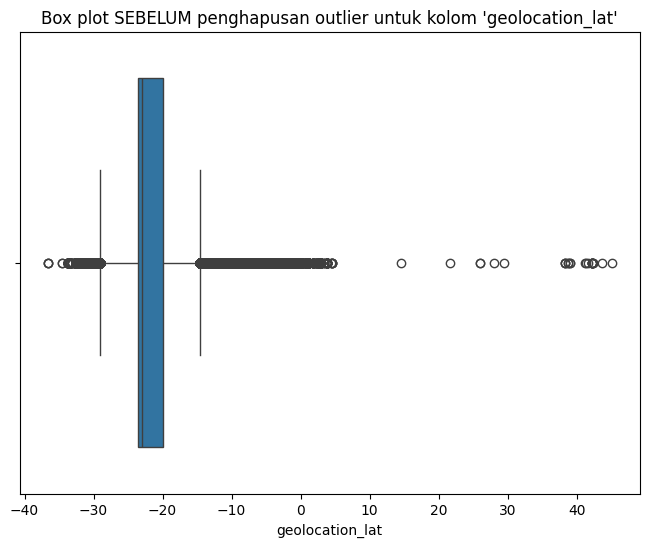

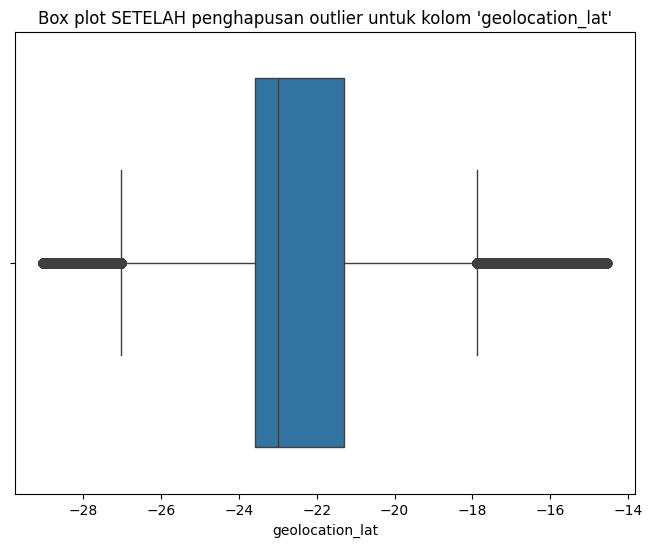

Outlier pada Dataset geolocation_dataset kolom : 'geolocation_lng'


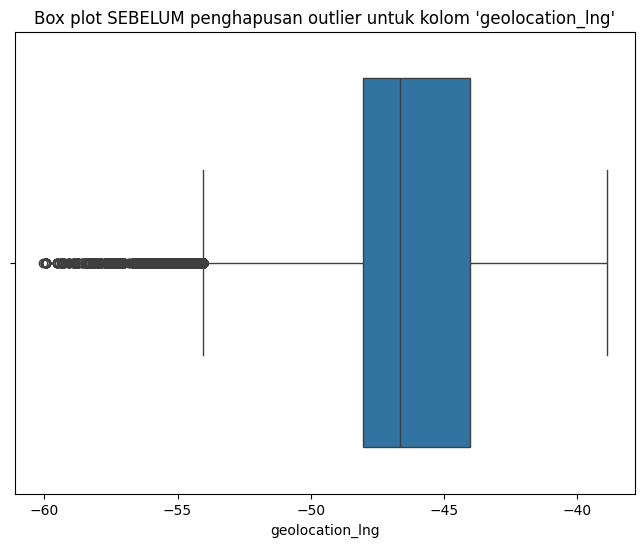

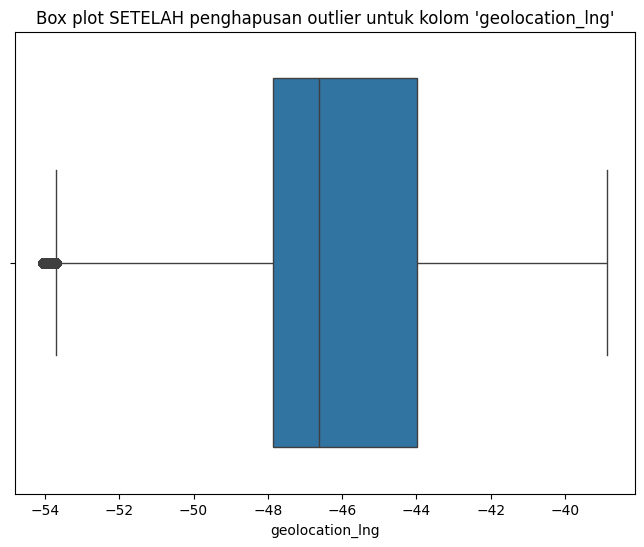




=== Menghapus Outlier pada Dataset: order_items_dataset ===
Outlier pada Dataset order_items_dataset kolom : 'order_item_id'


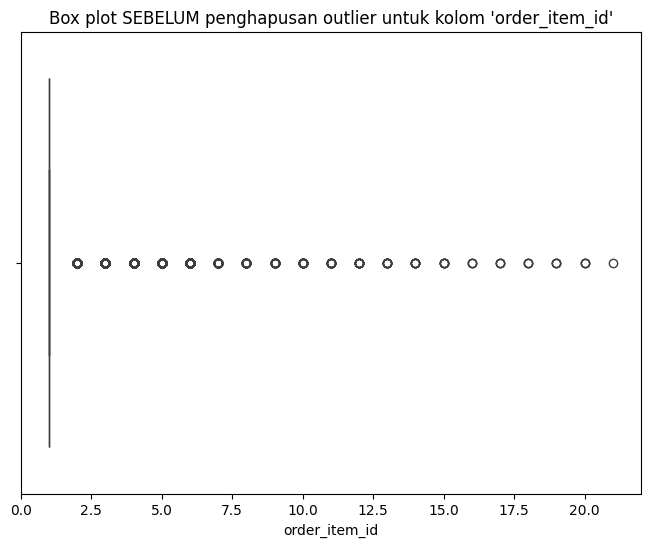

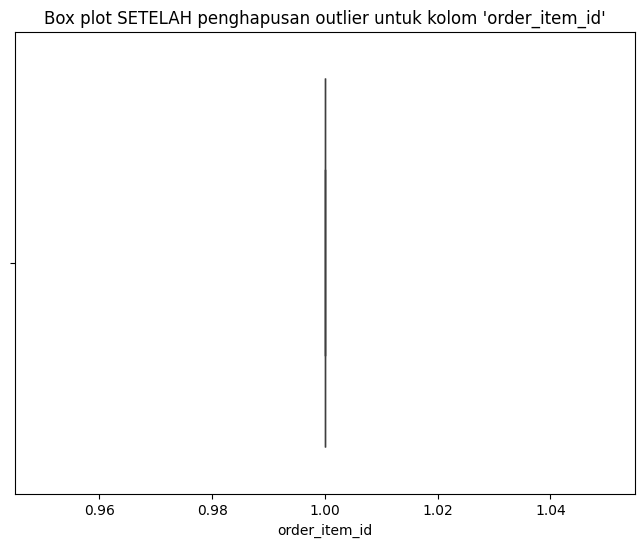

Outlier pada Dataset order_items_dataset kolom : 'price'


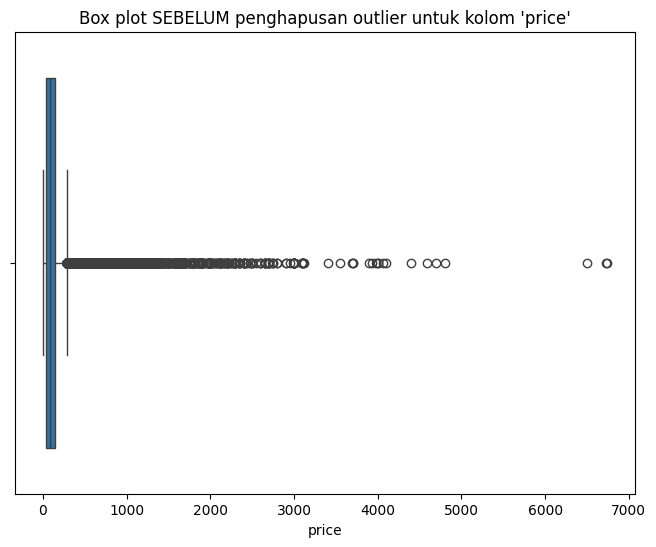

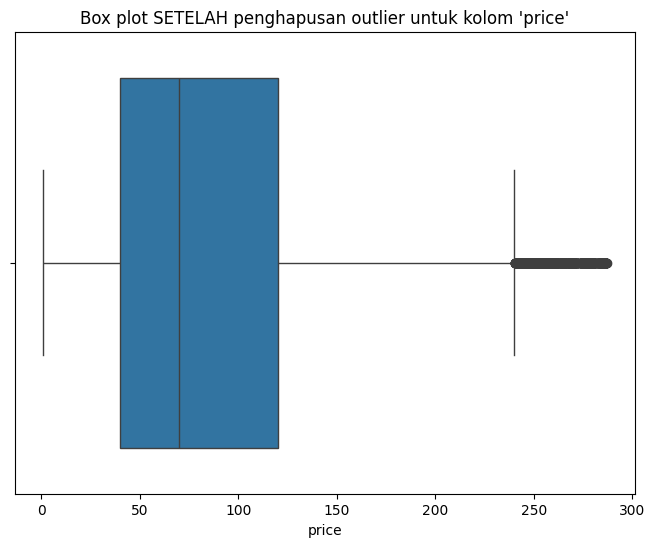

Outlier pada Dataset order_items_dataset kolom : 'freight_value'


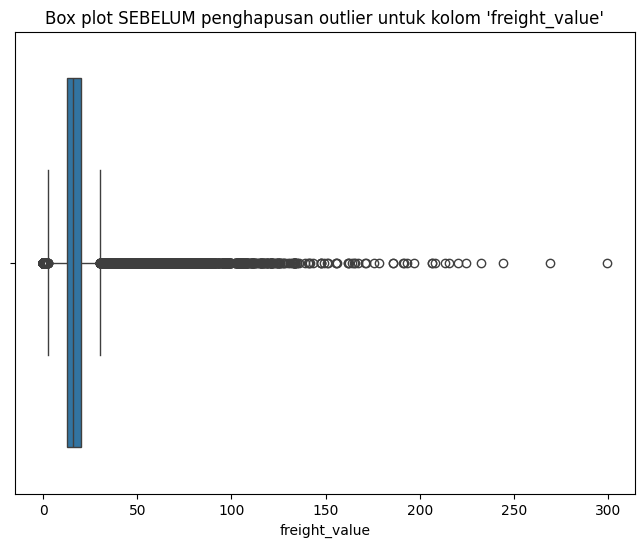

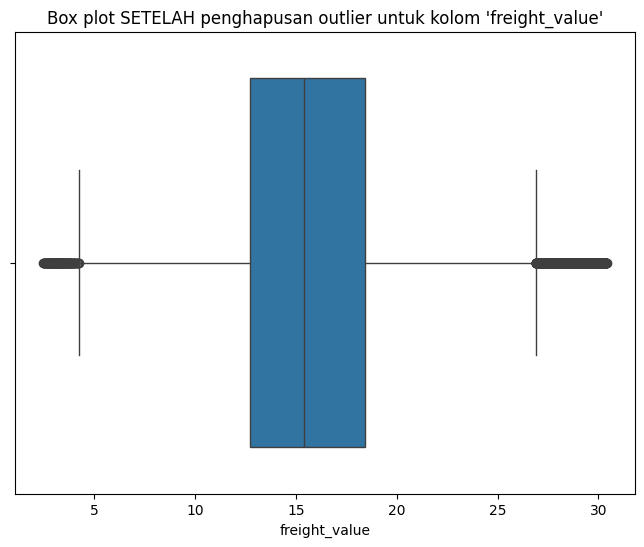




=== Menghapus Outlier pada Dataset: order_payments_dataset ===
Outlier pada Dataset order_payments_dataset kolom : 'payment_sequential'


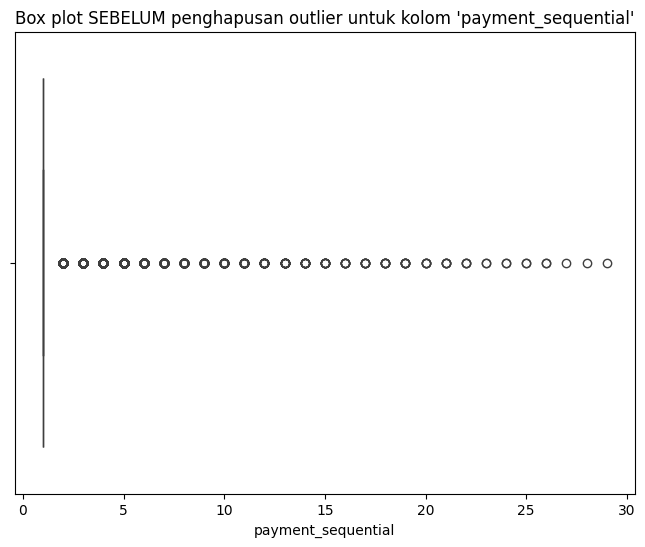

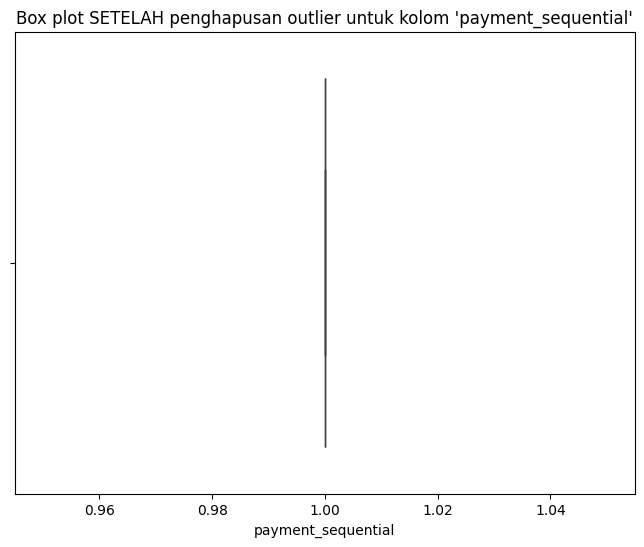

Outlier pada Dataset order_payments_dataset kolom : 'payment_installments'


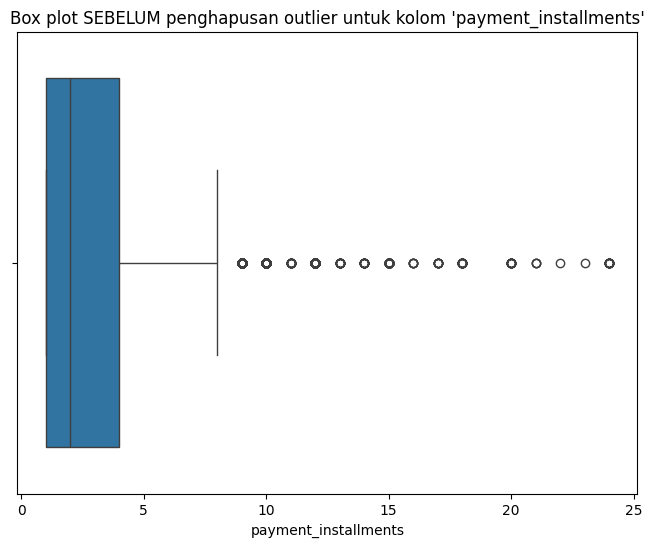

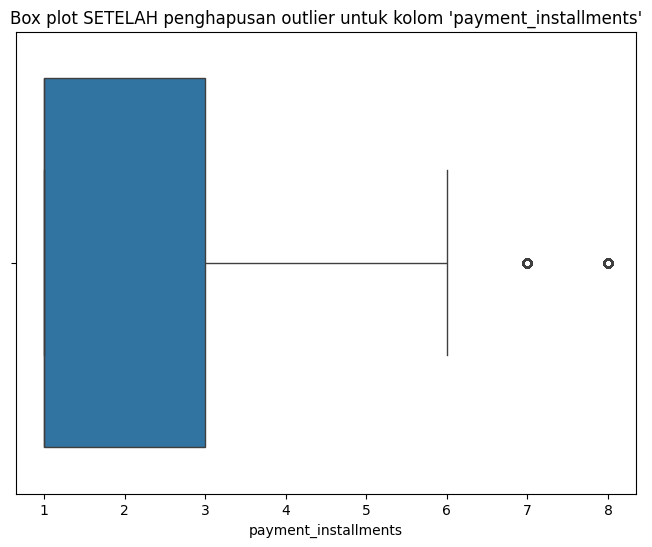

Outlier pada Dataset order_payments_dataset kolom : 'payment_value'


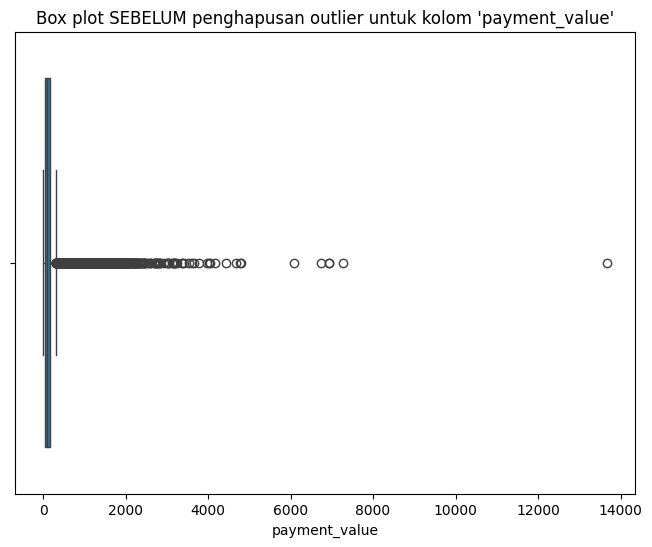

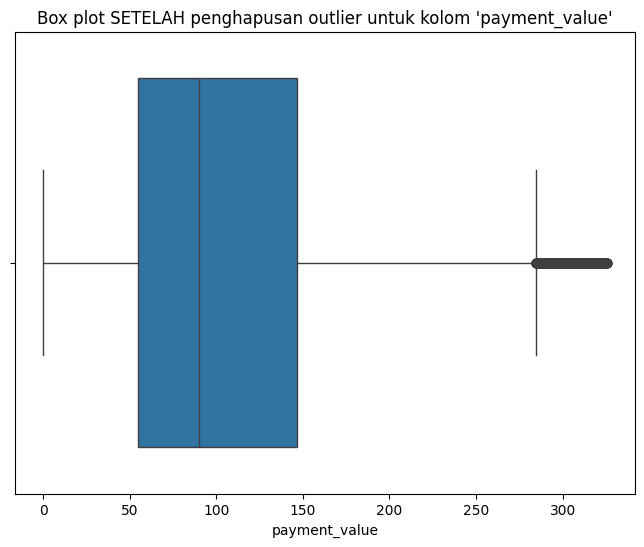




=== Menghapus Outlier pada Dataset: order_reviews_dataset ===
Outlier pada Dataset order_reviews_dataset kolom : 'review_score'


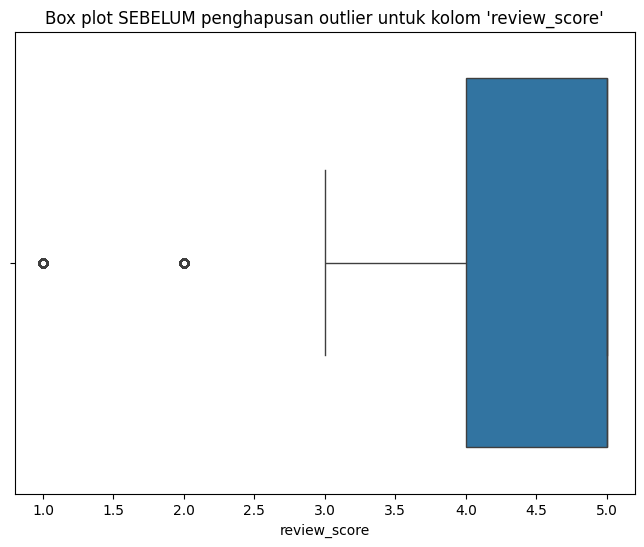

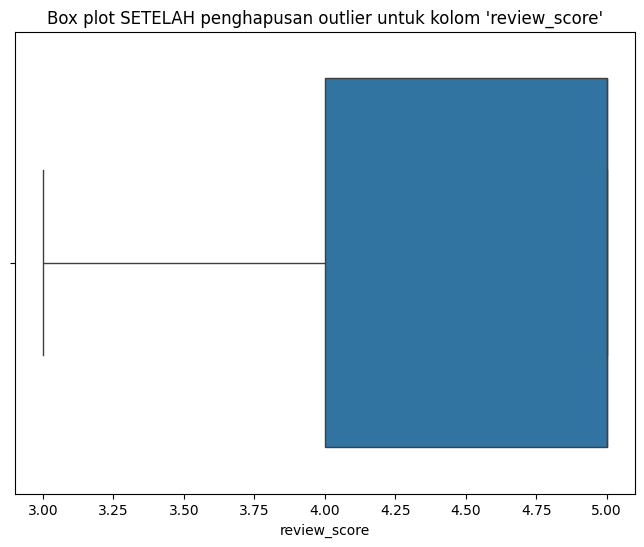




=== Menghapus Outlier pada Dataset: orders_dataset ===



=== Menghapus Outlier pada Dataset: product_category_name_translation ===



=== Menghapus Outlier pada Dataset: products_dataset ===
Outlier pada Dataset products_dataset kolom : 'product_name_lenght'


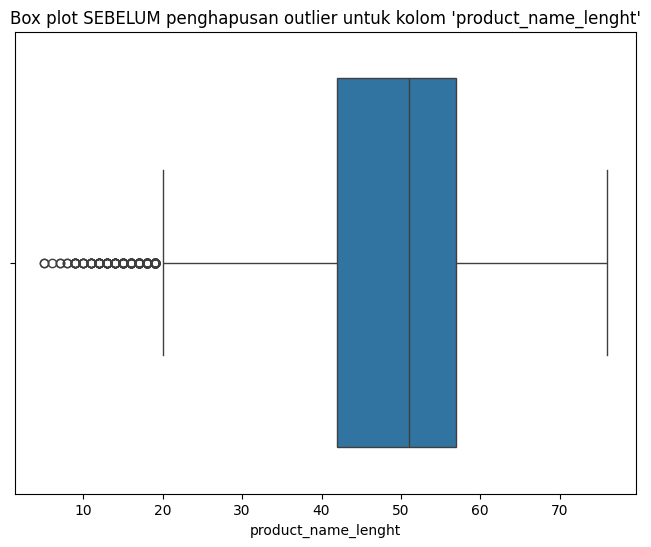

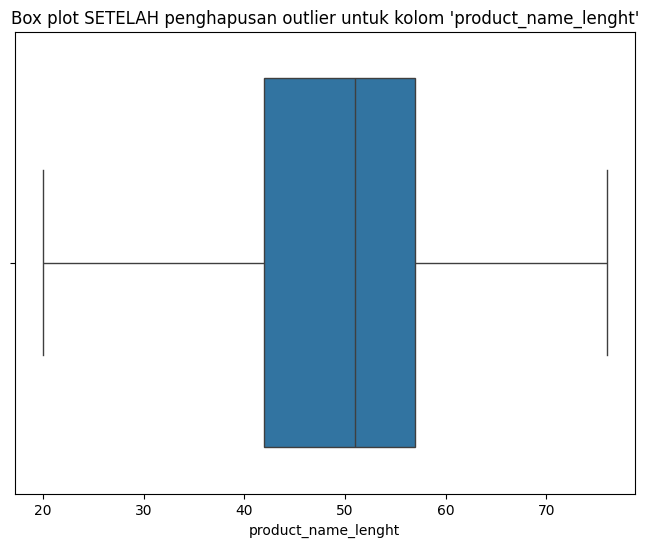

Outlier pada Dataset products_dataset kolom : 'product_description_lenght'


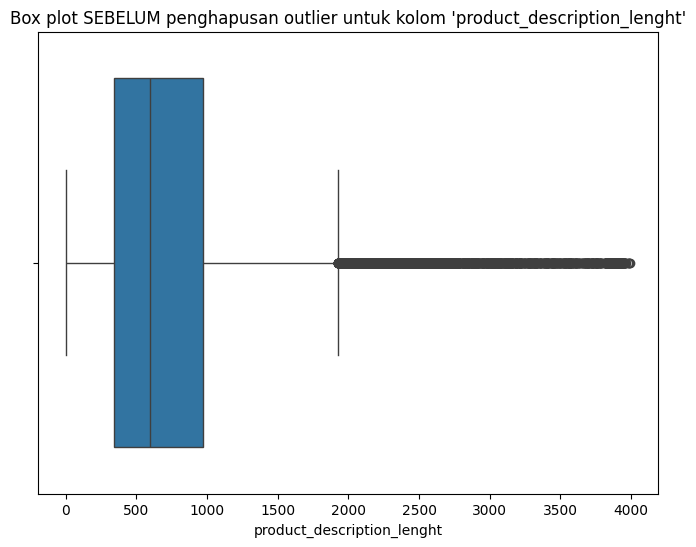

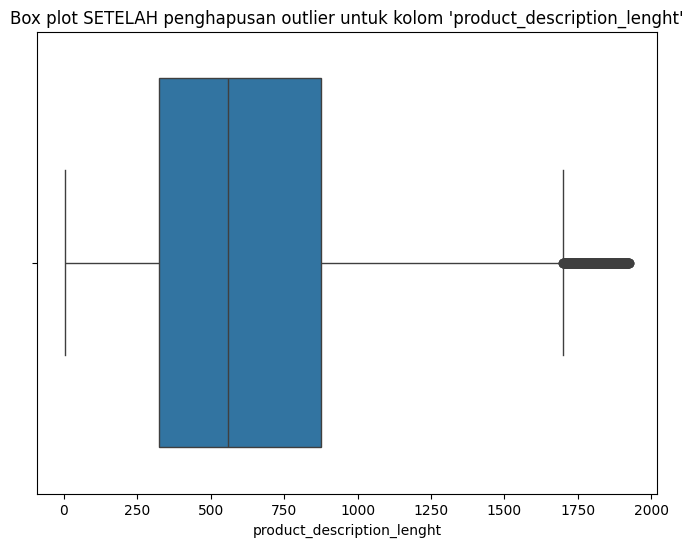

Outlier pada Dataset products_dataset kolom : 'product_photos_qty'


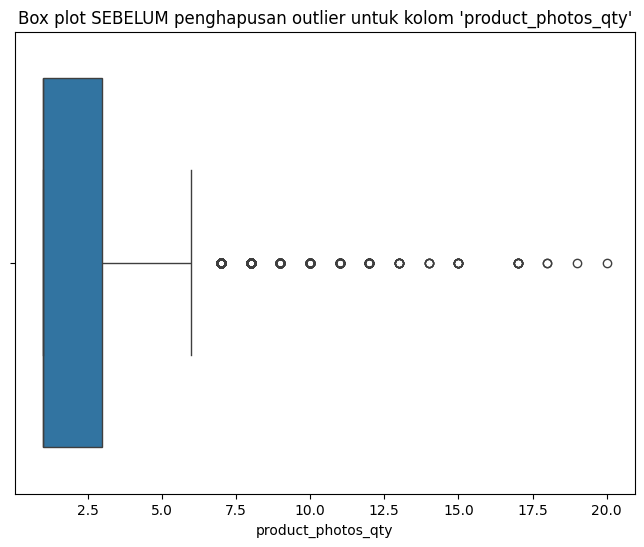

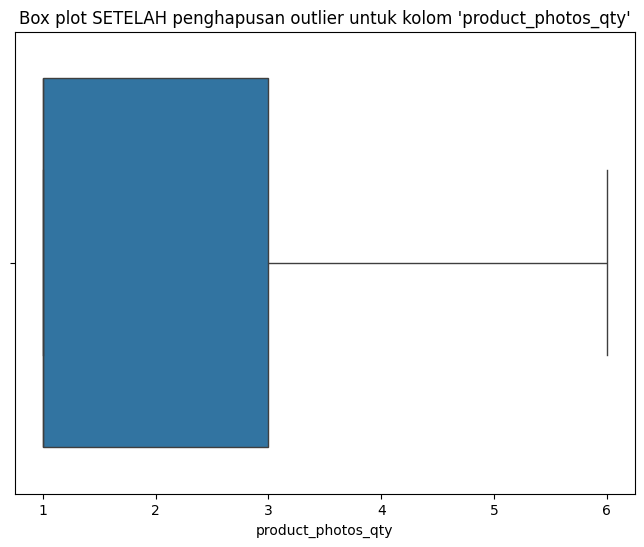

Outlier pada Dataset products_dataset kolom : 'product_weight_g'


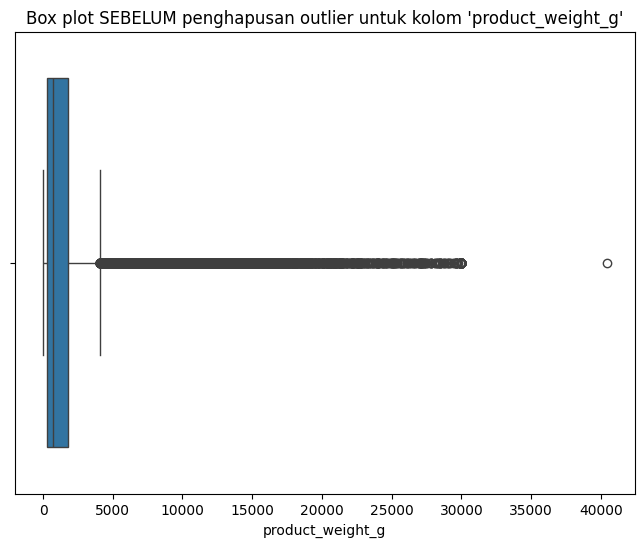

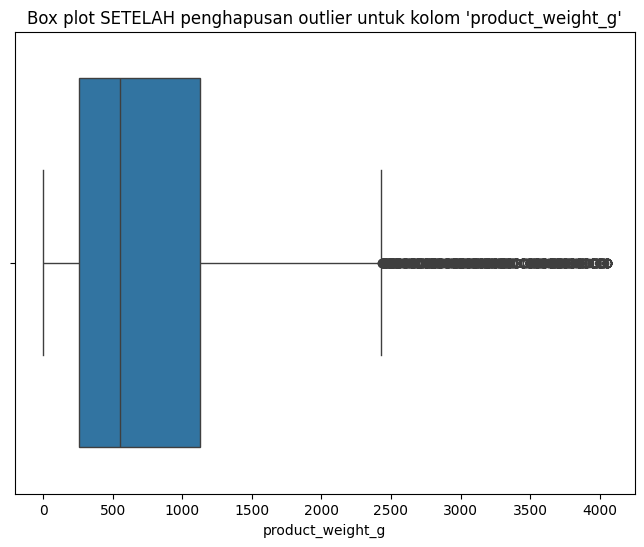

Outlier pada Dataset products_dataset kolom : 'product_length_cm'


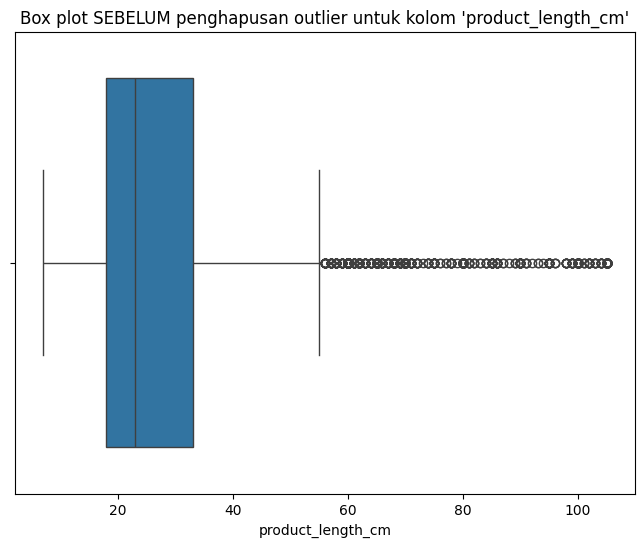

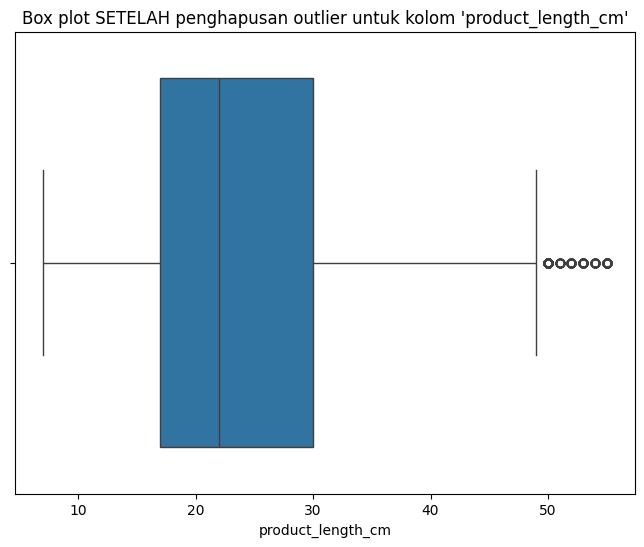

Outlier pada Dataset products_dataset kolom : 'product_height_cm'


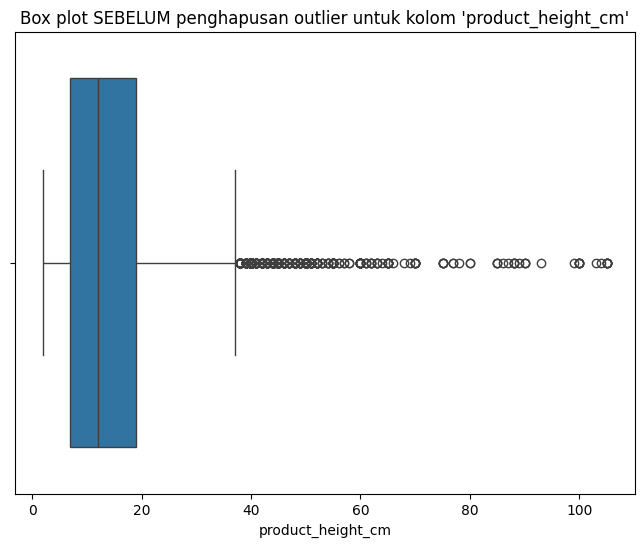

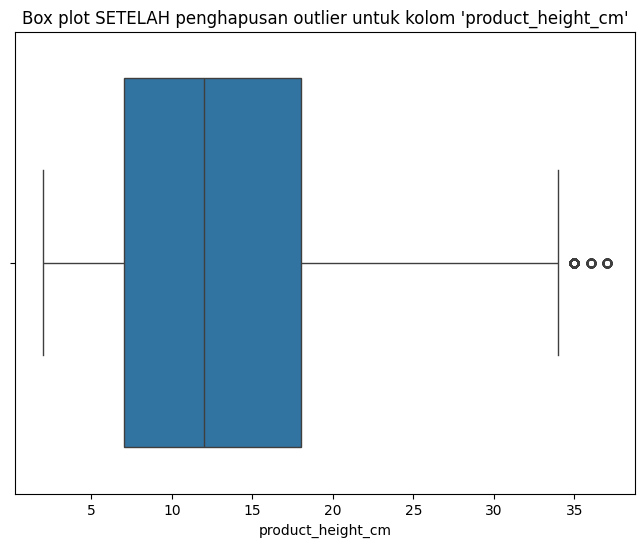

Outlier pada Dataset products_dataset kolom : 'product_width_cm'


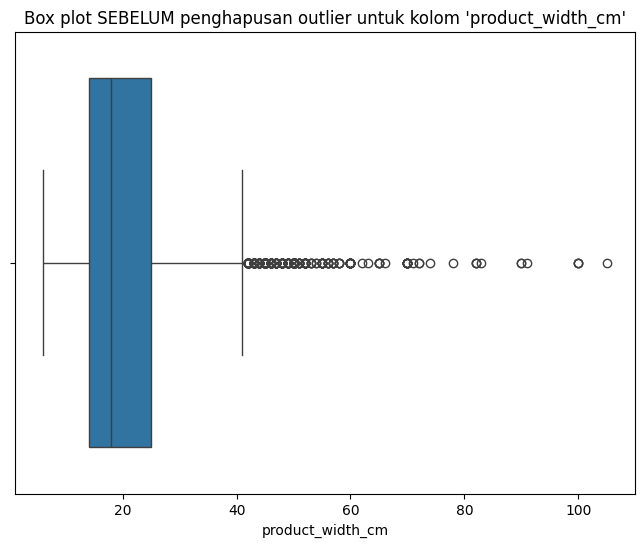

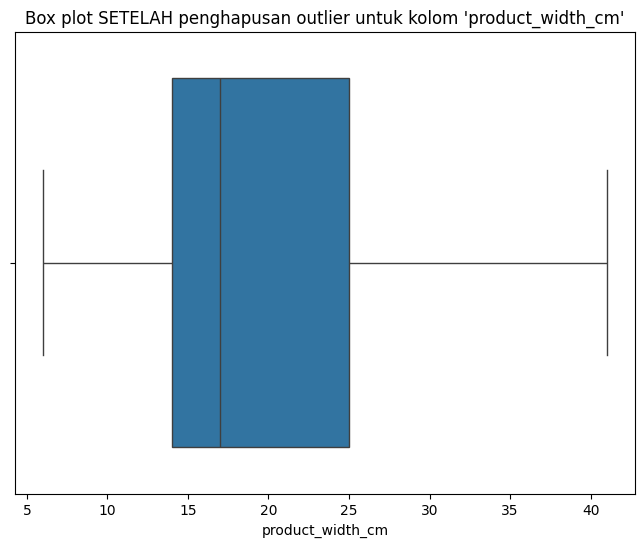




=== Menghapus Outlier pada Dataset: sellers_dataset ===




In [277]:
for name, file in files.items():
    print(f"\n=== Menghapus Outlier pada Dataset: {name} ===")
    df = pd.read_csv(file)
    
    # Tentukan kolom yang ingin dicek outlier-nya
    for column in df.select_dtypes(include=['float64', 'int64']).columns:  # Cek hanya kolom numerik
        Q1 = df[column].quantile(0.25)  # Kuartil pertama
        Q3 = df[column].quantile(0.75)  # Kuartil ketiga
        IQR = Q3 - Q1  # Interquartile range
        
        # Tentukan batas bawah dan atas untuk outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identifikasi outlier
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        if not outliers.empty:
            print(f"Outlier pada Dataset {name} kolom : '{column}'")
            
            # Visualisasi dengan box plot sebelum penghapusan
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column])
            plt.title(f"Box plot SEBELUM penghapusan outlier untuk kolom '{column}'")
            plt.xlabel(column)
            plt.show()

            # Menghapus outlier
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
            
            # Visualisasi dengan box plot setelah penghapusan
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column])
            plt.title(f"Box plot SETELAH penghapusan outlier untuk kolom '{column}'")
            plt.xlabel(column)
            plt.show()

    # Menyimpan dataframe yang sudah dibersihkan dalam dictionary
    cleaned_df[name] = df

    print("\n" + "="*50 + "\n")

#### **Insight:**

Dari hasil cleansing data kotor di atas, telah diperoleh data bersih guna memperoleh insight yang nantinya digunakan untuk menjawab pertanyaan analisis.

## Exploratory Data Analysis (EDA)


### Eksplorasi Data semua dataset
Karena geolocation_dataset hanya berisi geolocation_lat dan geolocation_lng yang kurang begitu penting maka dataset tersebut tidak akan dipakai pada saat ini

In [278]:
# Melakukan EDA untuk setiap dataset
for name, file in files.items():
    print(f"\n=== Eksplorasi Data untuk Dataset: {name} ===")
    df = pd.read_csv(file)

    # 1. Menampilkan deskripsi statistik dari dataset
    print("\nDeskripsi statistik dataset:")
    print(tabulate(df.describe(include="all"), headers="keys", tablefmt="grid"))
    print("\n" + "="*50 + "\n")
    
    # 2. Menampilkan jumlah customer_id unik berdasarkan customer_city
    if 'customer_city' in df.columns and 'customer_id' in df.columns:
        print("Jumlah customer_id unik berdasarkan customer_city:")
        print(df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False))
        print("\n" + "="*50 + "\n")

    # 3. Jumlah customer_city pada masing-masing order_status
    if 'order_status' in df.columns and 'customer_city' in df.columns:
        print("Jumlah customer_city pada masing-masing order_status:")
        print(df.groupby(by="order_status")["customer_city"].nunique())
        print("\n" + "="*50 + "\n")

    # 4. Jumlah order_id dengan total price diurutkan dari tertinggi ke terendah
    if 'order_id' in df.columns and 'price' in df.columns:
        order_total_price = df.groupby('order_id')['price'].sum().sort_values(ascending=False)
        print("Jumlah order_id dengan total price diurutkan dari tertinggi ke terendah:")
        print(order_total_price)
        print("\n" + "="*50 + "\n")

    # 5. Jumlah payment_type
    if 'payment_type' in df.columns:
        print("Jumlah payment_type:")
        print(df['payment_type'].value_counts())
        print("\n" + "="*50 + "\n")

    # 6. Jumlah review_score
    if 'review_score' in df.columns:
        print("Jumlah review_score:")
        print(df['review_score'].value_counts())
        print("\n" + "="*50 + "\n")

    # 7. Jumlah order_status
    if 'order_status' in df.columns:
        print("Jumlah order_status:")
        print(df['order_status'].value_counts())
        print("\n" + "="*50 + "\n")

    # 8. Jumlah seller_city
    if 'seller_city' in df.columns:
        print("Jumlah seller_city:")
        print(df['seller_city'].value_counts())
        print("\n" + "="*50 + "\n")


=== Eksplorasi Data untuk Dataset: customers_dataset ===

Deskripsi statistik dataset:
+--------+----------------------------------+----------------------------------+----------------------------+-----------------+------------------+
|        | customer_id                      | customer_unique_id               |   customer_zip_code_prefix | customer_city   | customer_state   |
+========+==================================+==================================+============================+=================+==================+
| count  | 99441                            | 99441                            |                    99441   | 99441           | 99441            |
+--------+----------------------------------+----------------------------------+----------------------------+-----------------+------------------+
| unique | 99441                            | 96096                            |                      nan   | 4119            | 27               |
+--------+--------------------

**Insight:**

Dari informasi di atas diketahui bahwa :
1. Harga item tertinggi sekitar **6735.000000** dan terendah berada pada harga **0.850000**
2. Jumlah total customer sekitar **99441**
3. Kota **sao paulo** adalah kota dengan pembelian terbanyak dengan produk terjual sejumlah **15540**
4. Nominal pembelian tertinggi sekitar **13664.080000** dan terendah berada pada nominal **0.000000**
5. Pembelian dengan credit_card adalah yang paling tinggi yaitu sekitar **76505** transaksi
6. Review score tertinggi dirating **5.000000** dan terendah berada pada rating **1.000000**
7. Rating 5 dilakukan oleh **56910** orang
8. Status **order_status** tertinggi adalah **delivered**, mari kita coba cek dengan kode berikut
9. Penjualan produk tertinggi adalah **bed_bath_table**, dan yang terendah adalah produk **cds_dvds_musicals**



### Eksplorasi Data new_dataframe
Selanjutnya mari kita gabungkan data dari dataset lain untuk mengetahui informasi lainya, dari dataset **orders_dataset** dengan **order_reviews_dataset, order_payments_dataset, order_items_dataset, dan customers_dataset**

In [294]:
# Menggabungkan dataframe yang sudah dibersihkan
merged_df = pd.merge(cleaned_df["customers_dataset"], cleaned_df["orders_dataset"], on="customer_id", how="left")
merged_df = pd.merge(merged_df, cleaned_df["order_items_dataset"], on="order_id", how="left")
merged_df = pd.merge(merged_df, cleaned_df["order_payments_dataset"], on="order_id", how="left")
merged_df = pd.merge(merged_df, cleaned_df["order_reviews_dataset"], on="order_id", how="left")
merged_df = pd.merge(merged_df, cleaned_df["products_dataset"], on="product_id", how="left")
merged_df = pd.merge(merged_df, cleaned_df["product_category_name_translation"], on="product_category_name", how="left")
new_dataframe = pd.merge(merged_df, cleaned_df["sellers_dataset"], how="left")

In [295]:
new_dataframe.drop(columns=[
    'customer_zip_code_prefix',
    'shipping_limit_date',
    'payment_sequential',
    'review_comment_message',
    'review_creation_date',
    'review_answer_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_estimated_delivery_date',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'seller_zip_code_prefix'
], inplace=True)

# Menyimpan dataset yang sudah digabungkan ke file CSV
new_dataframe.to_csv("dashboard/new_dataset.csv", index=False)

In [296]:
# Menampilkan hasil gabungan
new_dataframe.head(5)

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,product_category_name,product_category_name_english,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,...,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,moveis_escritorio,office_furniture,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,1.0,4aa6014eceb682077f9dc4bffebc05b0,...,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,utilidades_domesticas,housewares,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,1.0,bd07b66896d6f1494f5b86251848ced7,...,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,moveis_escritorio,office_furniture,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,1.0,a5647c44af977b148e0a3a4751a09e2e,...,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,moveis_escritorio,office_furniture,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,1.0,9391a573abe00141c56e38d84d7d5b3b,...,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,casa_conforto,home_confort,ibitinga,SP


In [282]:
new_dataframe.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "payment_value": "sum",
    "price": "sum"
}).sort_values(by="payment_value", ascending=False)


payment_value     price
customer_city product_category_name_english                         
sao paulo     bed_bath_table                     115870.16  97424.14
              health_beauty                      102904.57  86381.48
              computers_accessories               81599.79  75633.86
              sports_leisure                      76318.16  63512.25
              watches_gifts                       65460.09  61696.71
...                                                    ...       ...
assis         tablets_printing_image                  0.00     99.00
porto seguro  bed_bath_table                          0.00     99.99
volta grande  watches_gifts                           0.00     78.00
morrinhos     fashio_female_clothing                  0.00    149.90
mirandopolis  pet_shop                                0.00    145.00

[17219 rows x 2 columns]

### **Insight:**

Berdasarkan rangkuman parameter statistik dan persebaran demografi di atas, kita akan memperoleh informasi:
1. sao paulo adalah kota dengan penjualan tertinggi
2. computers_accessories adalah product dengan payment value tertinggi
3. computers_accessories adalah product dengan price tertinggi



## Data Visualization

1. Apa kategori produk yang memberikan kontribusi terbesar terhadap pendapatan di platform E-Commerce ini?

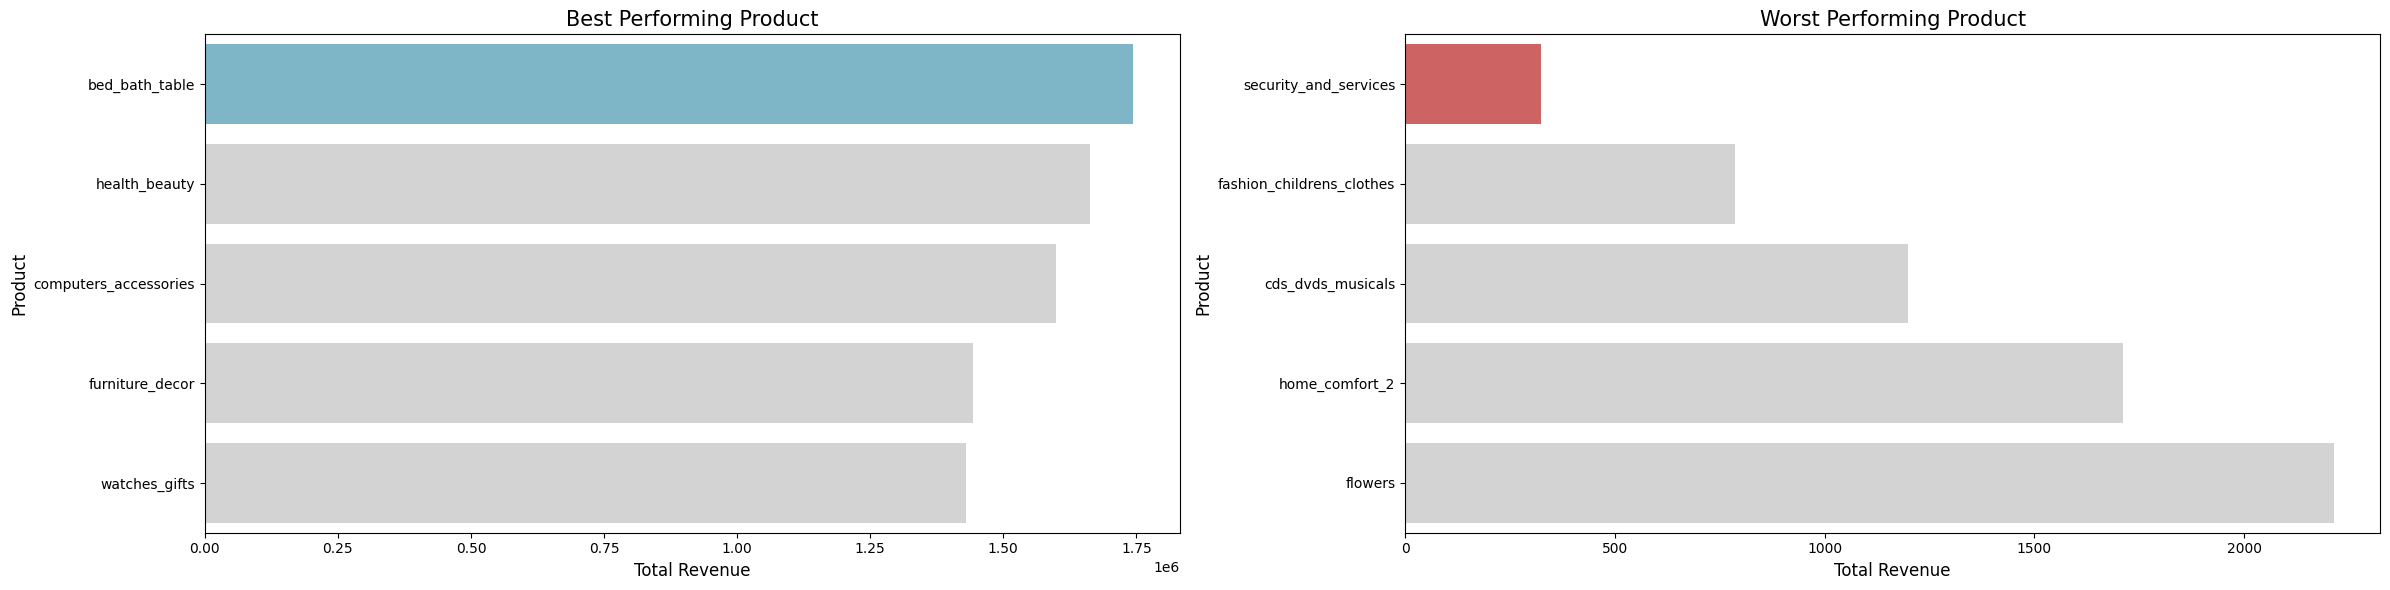

In [314]:
# Menghitung total pendapatan berdasarkan produk
product_revenue = (
    new_dataframe.groupby("product_category_name_english")["payment_value"]
    .sum()
    .sort_values(ascending=False)
)

# Mengambil Top 5 produk dengan pendapatan tertinggi (Best Performing)
top_5_products = product_revenue.head(5).sort_values(ascending=False)

# Mengambil Bottom 5 produk dengan pendapatan terendah (Worst Performing)
bottom_5_products = product_revenue.tail(5).sort_values(ascending=True)

# Membuat subplots dengan 1 baris dan 2 kolom
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Plot untuk Best Performing Products
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
sns.barplot(
    x=top_5_products.values,
    y=top_5_products.index,
    ax=ax[0],
    palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"],
    hue=top_5_products.index,
    legend=False
)
ax[0].set_xlabel("Total Revenue", fontsize=12)
ax[0].set_ylabel("Product", fontsize=12)

# Plot untuk Worst Performing Products
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
sns.barplot(
    x=bottom_5_products.values,
    y=bottom_5_products.index,
    ax=ax[1],
    palette=["#E05151", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"],
    hue=bottom_5_products.index,
    legend=False
)
ax[1].set_xlabel("Total Revenue", fontsize=12)
ax[1].set_ylabel("Product", fontsize=12)

# Layout and display
plt.tight_layout()
plt.show()

2. Bagaimana tren penjualan dan pendapatan dalam beberapa bulan terakhir?

In [331]:
# Menambahkan kolom bulan untuk pengelompokan
new_dataframe['order_purchase_timestamp'] = pd.to_datetime(new_dataframe['order_purchase_timestamp'])
new_dataframe['month'] = new_dataframe['order_purchase_timestamp'].dt.strftime('%B')

# Mengelompokkan berdasarkan bulan dan menghitung order_count dan revenue
monthly_orders_df = new_dataframe.groupby('month').agg({
    'order_id': 'nunique',  # Menghitung pesanan unik per bulan
    'price': 'sum'  # Menjumlahkan revenue per bulan
}).reset_index()

# Mengatur urutan bulan yang benar
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_orders_df['month'] = pd.Categorical(monthly_orders_df['month'], categories=month_order, ordered=True)

# Mengurutkan berdasarkan bulan
monthly_orders_df = monthly_orders_df.sort_values('month')

# Mengganti nama kolom
monthly_orders_df.rename(columns={
    'order_id': 'order_count',
    'price': 'revenue'
}, inplace=True)


# Tampilkan hasil
monthly_orders_df.head()


,month,order_count,revenue
4,January,8069,1123596.81
3,February,8508,1151526.15
7,March,9893,1427707.11
0,April,9343,1424312.98
8,May,10573,1581926.26


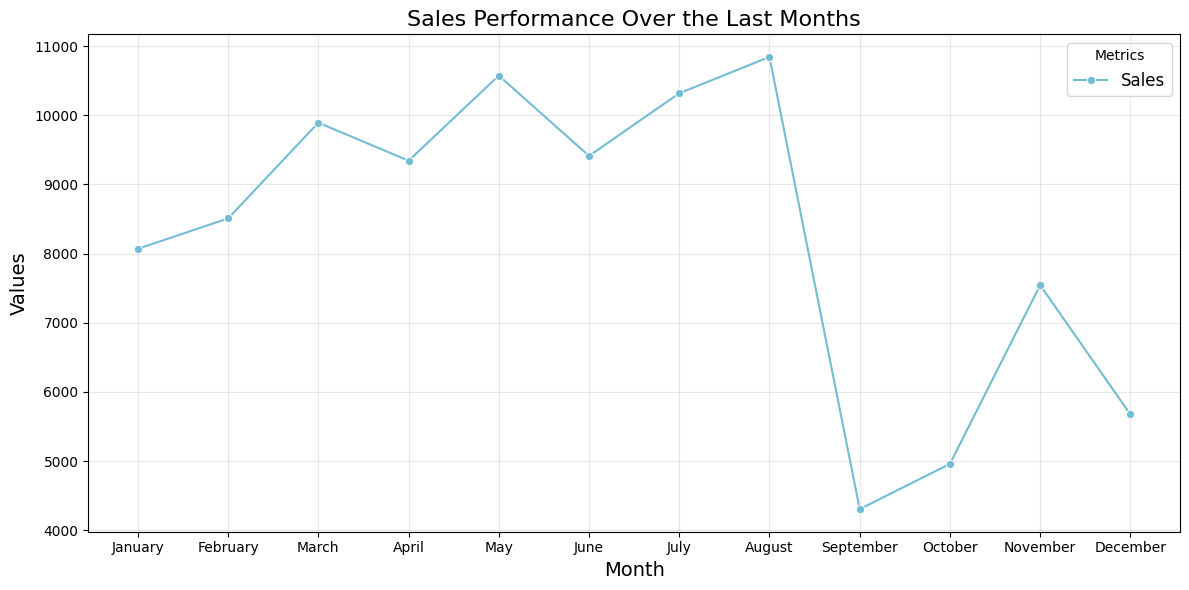

In [307]:
# Plotting the line chart
plt.figure(figsize=(12, 6))

# Menggunakan kolom 'month' untuk x-axis
sns.lineplot(
    x=monthly_orders_df["month"], 
    y=monthly_orders_df["order_count"], 
    marker="o", 
    label="Sales", 
    color="#72BCD4"
)

# Menambahkan judul dan label
plt.title("Sales Performance Over the Last Months", loc="center", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(title="Metrics", fontsize=12)
plt.grid(alpha=0.3)

# Menampilkan plot
plt.tight_layout()
plt.show()


3. Bagaimana hubungan antara harga produk dan volume penjualannya?

In [316]:
# Menampilkan hasil gabungan
new_dataframe.head(5)

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,...,payment_installments,payment_value,review_id,review_score,review_comment_title,product_category_name,product_category_name_english,seller_city,seller_state,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,...,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,moveis_escritorio,office_furniture,itaquaquecetuba,SP,May
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,1.0,4aa6014eceb682077f9dc4bffebc05b0,...,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,utilidades_domesticas,housewares,itajai,SC,January
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,1.0,bd07b66896d6f1494f5b86251848ced7,...,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,moveis_escritorio,office_furniture,itaquaquecetuba,SP,May
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,1.0,a5647c44af977b148e0a3a4751a09e2e,...,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,moveis_escritorio,office_furniture,itaquaquecetuba,SP,March
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,1.0,9391a573abe00141c56e38d84d7d5b3b,...,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,casa_conforto,home_confort,ibitinga,SP,July


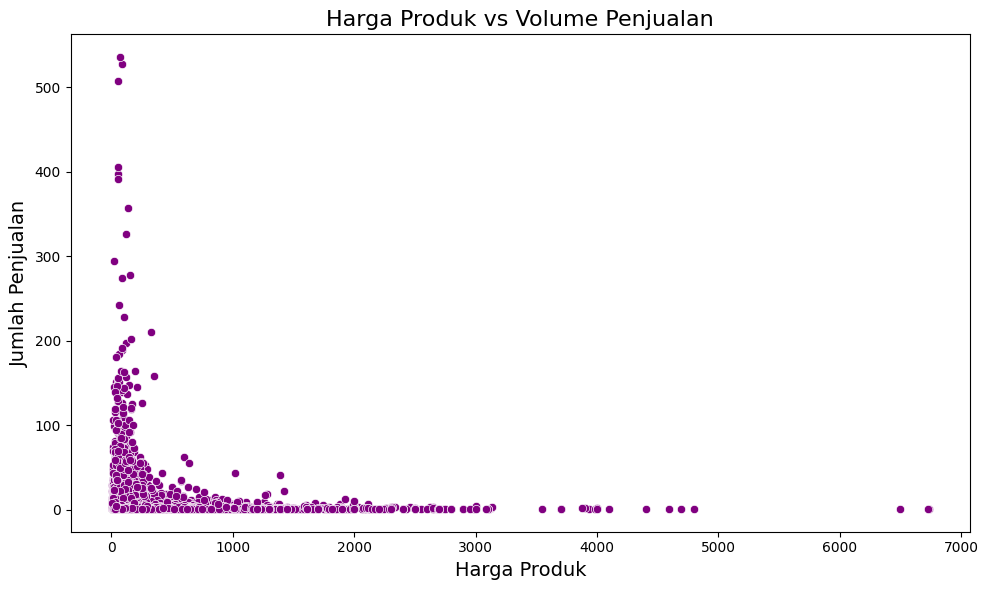

In [319]:
# Menghitung harga rata-rata dan volume penjualan per produk
product_sales = new_dataframe.groupby("product_id").agg({
    "price": "mean",  # Harga rata-rata produk
    "order_id": "count"  # Jumlah penjualan produk
})

# Plot scatter plot untuk harga vs volume penjualan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_sales, x="price", y="order_id", color="purple")
plt.title("Harga Produk vs Volume Penjualan", fontsize=16)
plt.xlabel("Harga Produk", fontsize=14)
plt.ylabel("Jumlah Penjualan", fontsize=14)
plt.tight_layout()
plt.show()


# Analisis Lanjutan

Di sini saya akan menggunakan teknik RFM Analysis (Recency, Frequency, Monetary) untuk mengelompokkan pelanggan berdasarkan tiga metrik utama:

- Recency (R): Mengukur waktu terakhir kali pelanggan melakukan pembelian.
- Frequency (F): Mengukur seberapa sering pelanggan melakukan pembelian dalam periode waktu tertentu.
- Monetary (M): Mengukur total pengeluaran pelanggan selama periode tersebut.

In [322]:
# Menghitung Recency, Frequency, dan Monetary untuk setiap customer
rfm_df = new_dataframe.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  # Mengambil tanggal order terakhir
    "order_id": "nunique",  # Menghitung jumlah order
    "payment_value": "sum"  # Menghitung jumlah uang yang dibelanjakan
})

# Mengubah nama kolom agar lebih mudah dipahami
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Menghitung Recency: menghitung hari sejak transaksi terakhir
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"]).dt.date
recent_date = new_dataframe["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Menghapus kolom 'max_order_timestamp' karena tidak dibutuhkan lagi
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# Tampilkan hasil RFM DataFrame
print(rfm_df.head())

                        customer_id  frequency  monetary  recency
0  00012a2ce6f8dcda20d059ce98491703          1    114.74      337
1  000161a058600d5901f007fab4c27140          1     67.41      458
2  0001fd6190edaaf884bcaf3d49edf079          1    195.42      596
3  0002414f95344307404f0ace7a26f1d5          1    179.35      427
4  000379cdec625522490c315e70c7a9fb          1    107.01      198


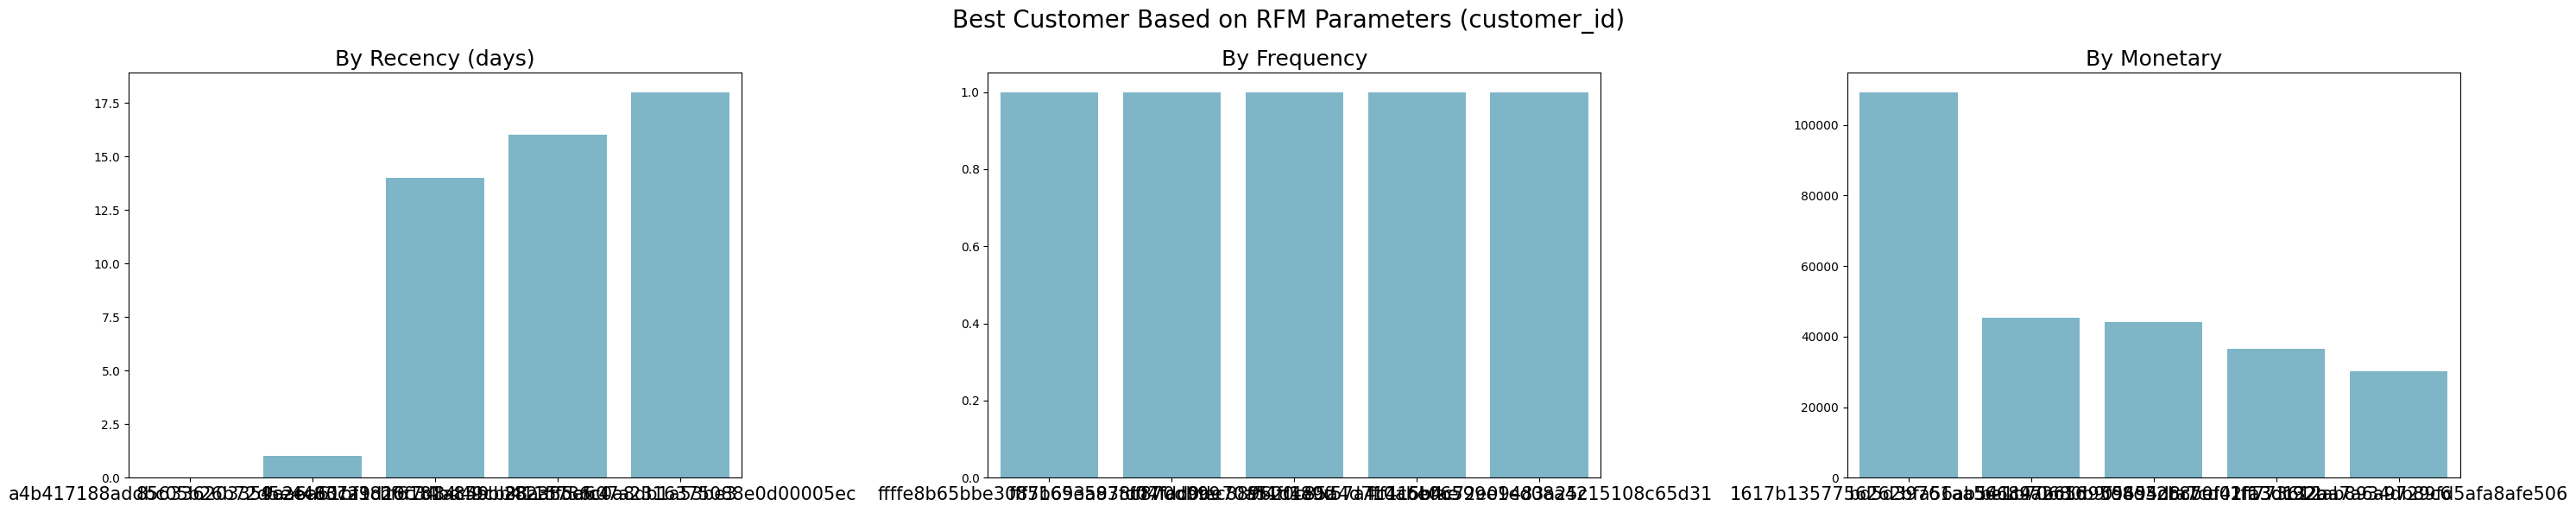

In [324]:
# Visualisasi untuk melihat customer terbaik berdasarkan RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Warna yang konsisten
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Visualisasi berdasarkan Recency
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), hue="customer_id", palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Visualisasi berdasarkan Frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), hue="customer_id", palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Visualisasi berdasarkan Monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), hue="customer_id", palette=colors, ax=ax[2], legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Menambahkan judul besar untuk seluruh visualisasi
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.tight_layout()
plt.show()


**Insight:**

1. Pelanggan dengan ID "00012a2ce6f8dcda20d059ce98491703":

- Recency: 337 hari (Score: 4).
- Frequency: 1 transaksi (Score: 5).
- Monetary: 114.74 (Score: 4).

Saran: Pelanggan ini memiliki potensi besar dalam hal pembelian ulang jika diberi insentif yang tepat, misalnya diskon atau penawaran menarik. Namun, dengan hanya satu transaksi dan recency yang tinggi, mereka termasuk dalam kategori pelanggan yang perlu dipulihkan.

2. Pelanggan dengan ID "000161a058600d5901f007fab4c27140":

- Recency: 458 hari (Score: 3).
- Frequency: 1 transaksi (Score: 5).
- Monetary: 67.41 (Score: 5).

Saran: Pelanggan ini mungkin membutuhkan lebih banyak motivasi untuk melakukan pembelian lagi, seperti penawaran berbasis produk yang lebih sesuai dengan minat mereka atau diskon yang lebih besar. Mereka juga menunjukkan pengeluaran yang lebih rendah, yang mungkin menunjukkan kurangnya keterikatan dengan brand.

3. Pelanggan dengan ID "0001fd6190edaaf884bcaf3d49edf079":

- Recency: 596 hari (Score: 2).
- Frequency: 1 transaksi (Score: 5).
- Monetary: 195.42 (Score: 3).

Saran: Pelanggan ini memiliki potensi yang baik jika perusahaan dapat melakukan upaya pemulihan dengan menawarkan produk yang relevan atau menghubungkan mereka kembali melalui penawaran yang menarik. Namun, perlu perhatian lebih karena recency yang sangat tinggi.

4. Pelanggan dengan ID "0002414f95344307404f0ace7a26f1d5":

- Recency: 427 hari (Score: 3).
- Frequency: 1 transaksi (Score: 5).
- Monetary: 179.35 (Score: 4).

Saran: Pelanggan ini membutuhkan perhatian untuk membawa mereka kembali dengan penawaran khusus atau diskon besar, karena frekuensi yang rendah dan recency yang cukup tinggi. Meskipun pengeluarannya cukup besar, namun ada risiko mereka tidak akan kembali tanpa upaya yang signifikan.

5. Pelanggan dengan ID "000379cdec625522490c315e70c7a9fb":

- Recency: 198 hari (Score: 5).
- Frequency: 1 transaksi (Score: 5).
- Monetary: 107.01 (Score: 5).

Saran: Pelanggan ini mungkin membutuhkan lebih banyak waktu untuk berinteraksi lebih jauh dengan brand. Oleh karena itu, perlu ditargetkan dengan promosi yang dapat meningkatkan frekuensi pembelian dan pengeluaran mereka. Karena recency yang rendah, mereka memiliki potensi untuk menjadi pelanggan yang lebih sering membeli dengan penawaran yang tepat.

# **Conclusion:**

Dari analisis RFM ini, dapat disimpulkan bahwa sebagian besar pelanggan dalam dataset ini termasuk dalam kategori **satu kali pembelian** dengan frekuensi dan recency yang **rendah**. Mereka bisa dikategorikan sebagai **pelanggan yang hilang** atau **pelanggan yang perlu dipulihkan**. Untuk meningkatkan retensi pelanggan, strategi seperti **penawaran pribadi, diskon, dan promosi khusus** yang disesuaikan dengan preferensi pelanggan akan menjadi langkah yang sangat penting.